In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import os
import torch 
import fl_utils as fl_utils 
import torch.nn as nn 
import get_data as gd
import tensorflow as tf
import evidential_deep_learning as edl
from torch.optim import Adam
import torch.nn.functional as F

In [4]:
def load_test_dataset():
    # Read the JSON file
    with open('test_dataset/data.json', 'r') as file:
        json_str = file.read()
    # Convert JSON string to DataFrame
    df = pd.read_json(json_str, orient='records')

    return df

In [14]:
#CLIENT 0
train_dataset_client = []
local_id = 0
with open(f'clients/client_{local_id}.json', 'r') as f:
        train_dataset_client = pd.read_json(f, orient='records', lines=True)


# Convert the DataFrame to a Tensor
train_dataset_client_tensor = torch.tensor(train_dataset_client.values)
train_data_loader_client_0 = torch.utils.data.DataLoader(train_dataset_client_tensor, 
                                    batch_size=1024, 
                                    shuffle=False, 
                                    num_workers=4, 
                                    pin_memory=False, # NO CUDA
                                    drop_last=True)
### datasets
train_dataset = train_data_loader_client_0
test_dataset = load_test_dataset()  ### GLOBAL DATSET


FileNotFoundError: [Errno 2] No such file or directory: 'clients/client_0.json'

In [8]:
display(train_dataset)

In [35]:
# Convert the DataFrame to a Tensor
train_dataset_client_tensor = torch.tensor(train_dataset_client.values, dtype=torch.float32)
test_dataset_tensor = torch.tensor(test_dataset.values, dtype=torch.float32)
# Create DataLoader for training dataset
train_data_loader_client_0 = torch.utils.data.DataLoader(train_dataset_client_tensor, batch_size=1024, shuffle=False, num_workers=4, pin_memory=False, drop_last=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset_tensor, batch_size=1024, shuffle=False, num_workers=4, pin_memory=False, drop_last=True)


In [36]:
# Initialize an empty list to collect the tensors
data_list = []
data_list_test = []
# Loop through the DataLoader and collect the batches
for i, data in enumerate(train_data_loader_client_0):
    data_list.append(data)

for i, data in enumerate(test_data_loader):
    data_list_test.append(data)

# Concatenate all the tensors in the list to form a single tensor
all_data_tensor = torch.cat(data_list, dim=0)
all_data_tensor_test = torch.cat(data_list_test, dim=0)

# Convert the tensor to a numpy array and then to a DataFrame
all_data_array = all_data_tensor.numpy()
all_data_array_test = all_data_tensor_test.numpy()
all_data_df = pd.DataFrame(all_data_array, columns=['x_values', 'x_wind_speed', 'y_ground_truth', 'observed_data', 'model', 'Wind Speed (m/s)', 'Blade Length (m)', 'Power Output (W)', 'Power Output (kW)', 'Power Output (MW)'])
all_data_df_test = pd.DataFrame(all_data_array_test, columns=['x_values', 'x_wind_speed', 'y_ground_truth', 'observed_data', 'model', 'Wind Speed (m/s)', 'Blade Length (m)', 'Power Output (W)', 'Power Output (kW)', 'Power Output (MW)'])
# Display the DataFrame


In [63]:
from torch.utils.data import TensorDataset, DataLoader

features = torch.tensor(all_data_df[['Wind Speed (m/s)', 'Blade Length (m)']].values, dtype=torch.float32)
target = torch.tensor(all_data_df['Power Output (W)'].values, dtype=torch.float32)

features_test = torch.tensor(all_data_df_test[['Wind Speed (m/s)', 'Blade Length (m)']].values, dtype=torch.float32)
target_test = torch.tensor(all_data_df_test['Power Output (W)'].values, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(features, target)
test_dataset = TensorDataset(features_test, target_test)

# Create DataLoader
train_data_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)  # Adjust batch_size as needed
test_dataset_loader = DataLoader(test_dataset, batch_size=8, shuffle=True)  # Adjust batch_size as needed

In [14]:
### TENSORFLOW

import tensorflow as tf
import numpy as np

# Convert pandas dataframes to numpy arrays
features_np = all_data_df[['Wind Speed (m/s)', 'Blade Length (m)']].values
target_np = all_data_df['Power Output (W)'].values

features_test_np = all_data_df_test[['Wind Speed (m/s)', 'Blade Length (m)']].values
target_test_np = all_data_df_test['Power Output (W)'].values

# # Convert numpy arrays to TensorFlow tensors
# features_tf = tf.convert_to_tensor(features_np, dtype=tf.float32)
# target_tf = tf.convert_to_tensor(target_np, dtype=tf.float32)
# features_test_tf = tf.convert_to_tensor(features_test_np, dtype=tf.float32)
# target_test_tf = tf.convert_to_tensor(target_test_np, dtype=tf.float32)

# # Create TensorFlow Datasets
# train_dataset = tf.data.Dataset.from_tensor_slices((features_tf, target_tf))
# test_dataset = tf.data.Dataset.from_tensor_slices((features_test_tf, target_test_tf))


NameError: name 'all_data_df' is not defined

In [13]:
features_np

NameError: name 'features_np' is not defined

In [65]:
for data, target in train_data_loader:
    display("data " , (data))
    display(target)
    break

for data, target in test_dataset_loader:
    display("data " , (data))
    display(target)
    break

'data '

tensor([[  4.8226, 199.0000],
        [ 29.0464, 199.0000],
        [ 14.2530, 199.0000],
        [  8.2502, 129.0000],
        [ 19.8771, 100.0000],
        [ 24.2506, 129.0000],
        [  0.5744, 113.0000],
        [ 26.7768,  94.0000]])

tensor([ 2244817.5000,        0.0000, 46860124.0000,  4071420.2500,
        11833019.0000, 19692006.0000,        0.0000,        0.0000])

'data '

tensor([[  9.3806,  98.0000],
        [ 21.7137, 174.0000],
        [ 11.9588, 158.0000],
        [ 14.7272,  94.0000],
        [ 10.2040,  76.0000],
        [ 17.2673,  42.0000],
        [ 21.0555, 125.0000],
        [ 21.1741,  94.0000]])

tensor([ 4022085.2500, 35834240.0000, 20476654.0000, 10456119.0000,
         2978385.7500,  2088102.8750, 18494682.0000, 10458176.0000])

In [66]:
import torch
from torch.optim import Adam
import evidential_learning_pytorch as edl_pytorch

def run_train(conf, tr_loader, tt_loader, exist_model): 
    """
    model_dir: ../exp_data/../communication_round_%02d/    
    """
    print("===========================================================")
    print("                    Local ID %02d " % conf.use_local_id)
    print("===========================================================")

    print("The used batch size %d for client %d at round %d" % (conf.batch_size, conf.use_local_id, conf.round))

    # Initialize optimizer
    optimizer = Adam(exist_model.parameters(), lr=conf.lr)

    for epoch in range(conf.num_local_epochs):
        exist_model.train()  # Set model to training mode
        for data, target in tr_loader:
            optimizer.zero_grad()  # Clear gradients from previous iteration
            output = exist_model(data)  # Forward pass
            loss = edl_pytorch.EvidentialRegressionLoss(target, output)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update model parameters

    print("Done Local ID %02d" % conf.use_local_id)

    return exist_model


In [68]:
conf = {
    "use_local_id": 0,
    "round": 0,
    "batch_size": 1024,
    "sigma": 0,
    "num_local_epochs": 100,
    "lr": 0.1,
    "model_dir": "/results/communication_round_%02d" % 0,
}

from collections import namedtuple
Conf = namedtuple('Conf', conf.keys())
conf = Conf(*conf.values())

exist_model = Evidential(2).to(device)
# print(exist_model)
# print(type(exist_model))
_model = run_train(conf, train_data_loader, test_data_loader, exist_model)
print("MODEL : ", _model)   
print("done")

                    Local ID 00 
The used batch size 1024 for client 0 at round 0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (8x2 and 1x4)

### Tensorflow

In [4]:
def turbine_power_formula(df, blade_lengths):
    # Constants
    Cp = 0.25  # coefficient of performance 
    rho = 1.225  # Air density in kg/m^3 at sea level
    cut_in_speed = 3.5  # m/s
    rated_speed = 13.5  # m/s
    cut_out_speed = 25.0  # m/s
    noise_level = 0.08 # noise level as a percentage of power output
    # Empty list to store the rows
    rows = []
    
    for _, row in df.iterrows():
        for blade_length in blade_lengths:
            wind_speed = row['x_wind_speed']
            
            if cut_in_speed <= wind_speed < rated_speed:
                power = 0.5 * Cp * rho * np.pi * (blade_length**2) * (wind_speed**3)
                noise = np.random.normal(0, noise_level * power)
                power += noise
            elif wind_speed >= rated_speed and wind_speed < cut_out_speed:
                power = 0.5 * Cp * rho * np.pi * (blade_length**2) * (rated_speed**3)
                noise = np.random.normal(0, (noise_level / 200) * power)
                power += noise
            else:
                power = 0

            power_kW = power / 1000
            power_MW = power_kW / 1000
            
            # Append the data to the list
            rows.append(row.tolist()+[wind_speed, blade_length, power, power_kW, power_MW])
    
    # Convert list of rows to DataFrame
    columns = df.columns.tolist()+['Wind Speed (m/s)', 'Blade Length (m)', 'Power Output (W)', 'Power Output (kW)', 'Power Output (MW)'] 
    output_df = pd.DataFrame(rows, columns=columns)
    output_df = output_df.sort_values(by=['Wind Speed (m/s)', 'Blade Length (m)']).reset_index(drop=True)
    return output_df

def data_initialization(x_min, x_max, n, blade_lengths):
    # Generate wind speed data
    x = np.linspace(x_min, x_max, n)
    df = pd.DataFrame(x, columns=['x_values']) 

    # CONSTANTS    
    Systematic_Bias_R = 1.5  #  systematic bias
    MULT_wind = 1.20  # the noise in wind speed measurements

    sigma_X = 0.5  #  noise in wind speed measurement
    sigma_Y = 1.5 # noise for power output
    sigma_Model = 3  # Slightly increase model noise

    beta0 = 0.5  # Intercept 
    beta1 = 1.67 #  the slope 
    
    # Generate random wind speeds with noise
    random_wind_speeds = np.random.normal(df['x_values'], sigma_X) * Systematic_Bias_R * MULT_wind

    # Ensure generated values are always positive
    df['x_wind_speed'] = random_wind_speeds + np.abs(np.min(random_wind_speeds)) + 0.25  # Adding 1 to avoid zeros
    #true power output
    df['y_ground_truth']=np.random.normal(beta0+df['x_values']*beta1, 0)
    # observed power output with noise and bias
    df['observed_data']=np.abs(np.random.normal((beta0)+(df['x_wind_speed'])*(beta1), sigma_Y)*Systematic_Bias_R) #MEASUREMENTS WITH ALEATORIC and SYSTEMATIC BIAS
    # prediction
    df['model']=np.abs(np.random.normal((beta0)+df['x_wind_speed']*beta1, sigma_Model))
    
    # Calculate power by formula
    df = turbine_power_formula(df, blade_lengths)
    # Sort values
   # df = df.sort_values(by='x_wind_speed')
    return df

import random

def generate_blade_lengths():
    # Generate a random blade length between 40 and 220
    return [random.randint(40, 100) for _ in range(4)]

def generate_data_initialization():
    blade_lengths = generate_blade_lengths()
    blade_lengths.sort()

    x_max = random.randint(12, 22)
    x_min = 0
    n = 4096

    # Generate data with the specified parameters
    return data_initialization(x_min, x_max, n, blade_lengths)

# Generate data for each client and test data
# client = generate_data_initialization()
# client2 = generate_data_initialization()
# client3 = generate_data_initialization()
# test_data = generate_data_initialization()


In [269]:
### GENERATE CLIENT AND TEST DATA AND SAVE IT TO JSON FILES

In [5]:
import os
os.makedirs('clients_single_blade', exist_ok=True)
for i in range(0, 10):
    client_data = generate_data_initialization()
    # Convert DataFrame to JSON string
    client_data_json = client_data.to_json(orient='records', lines=True)
    with open(f'clients_single_blade/client_{i}.json', 'w') as f:
        f.write(client_data_json)

In [6]:
# Generate and save data for test dataset
test_data = generate_data_initialization()
# Convert DataFrame to JSON string
test_data_json = test_data.to_json(orient='records', lines=True)
with open('clients_single_blade/test_data.json', 'w') as f:
    f.write(test_data_json)

In [7]:
# Directory where the files are stored
directory = 'clients_single_blade'

# Initialize a dictionary to hold the data
data = {}

# Read data for 10 clients
for i in range(1, 11):
    file_path = os.path.join(directory, f'client_{i}.json')
    data[f'client_{i}'] = pd.read_json(file_path, orient='records', lines=True)

# Read test data
test_data_path = os.path.join(directory, 'test_data.json')
data['test_data'] = pd.read_json(test_data_path, orient='records', lines=True)

# Now data dictionary contains all the DataFrames
# Accessing data for client 1
client_1_data = data['client_1']

# Accessing test data
test_data = data['test_data']

In [274]:
print(len(data))

11


In [4]:
# client 1
client_train_data1_x = client[['Wind Speed (m/s)']]
client_train_data1_y = client[['Power Output (MW)']]
#client 2
client_train_data2_x = client2[['Wind Speed (m/s)']]
client_train_data2_y = client2[['Power Output (MW)']]
#client 3
client_train_data3_x = client3[['Wind Speed (m/s)']]
client_train_data3_y = client3[['Power Output (MW)']]
#test
test_data_x = test_data[['Wind Speed (m/s)']]
test_data_y = test_data[['Power Output (MW)']]

In [ ]:
def evaluate_aggregated_model(conf, model_group):
    num_params = len(model_group)

    # Create a new model instance
    averaged_model = create_model(conf)

    if not averaged_model.built:
        input_shape = conf.get('input_shape')
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        averaged_model.build((None,) + input_shape)

    # Set the averaged weights
    averaged_model_weights = [model_group[f'param_{i}'] for i in range(num_params)]
    averaged_model.set_weights(averaged_model_weights)

    return averaged_model

final_model = evaluate_aggregated_model(conf, model_group)
final_model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 64)                128       
                                                                 
 dense_136 (Dense)           (None, 64)                4160      
                                                                 
 dense_normal_gamma_44 (Den  (None, 4)                 260       
 seNormalGamma)                                                  
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# Scatter plot for Client 1
plt.scatter(client_train_data1_x, client_train_data1_y, color='blue', label='Client 1', marker='o')
# Scatter plot for Client 2
plt.scatter(client_train_data2_x, client_train_data2_y, color='green', label='Client 2', marker='^')
# Scatter plot for Client 3
plt.scatter(client_train_data3_x, client_train_data3_y, color='red', label='Client 3', marker='s')
# Scatter plot for Test Data
plt.scatter(test_data_x, test_data_y, color='purple', label='Test Data', marker='x')
# Adding title and labels
plt.title('Wind Speed vs Power Output for Different Clients and Test Data')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power Output (MW)')
# Adding legend
plt.legend()

# Show plot
plt.show()

NameError: name 'client_train_data1_x' is not defined

<Figure size 1000x800 with 0 Axes>

In [217]:
client2.head()

,x_values,x_wind_speed,y_ground_truth,observed_data,model,Wind Speed (m/s),Blade Length (m),Power Output (W),Power Output (kW),Power Output (MW)
0,0.078877,0.250000,0.631724,3.771925,3.944646,0.250000,127,0.0,0.0,0.0
1,0.009280,1.034591,0.515497,1.449210,2.670002,1.034591,127,0.0,0.0,0.0
2,0.171673,1.091083,0.786694,4.740285,1.277446,1.091083,127,0.0,0.0,0.0
3,0.004640,1.141608,0.507748,5.730318,6.017859,1.141608,127,0.0,0.0,0.0
4,0.167033,1.361470,0.778945,6.812904,5.897280,1.361470,127,0.0,0.0,0.0


In [12]:
def EvidentialRegressionLoss(true, pred):
    return edl.losses.EvidentialRegression(true, pred, coeff=1e-2)
def plot_predictions(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    x_test = x_test[:, 0]
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting
    # # Set uncertainty to 0 for x_test values above 13.5
    # mask = x_test > 13.5
    # var[mask] = 0
    
    plt.figure(figsize=(16, 6), dpi=100)
    plt.scatter(x_train, y_train, s=1., c='#463c3c', zorder=0, label="Train")
    plt.plot(x_test, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test, mu, color='#007cab', zorder=3, label="Pred") # prediction line
    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test, (mu - k * var), (mu + k * var),
            alpha=0.3,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
        
    plt.gca().set_ylim(-8, 22)
    plt.gca().set_xlim(-2, 50)
    plt.legend(loc="upper left")
    plt.show()
def get_uncertainty_estimation(predictions, x_test):
    x_test = x_test.reshape(-1,)    
    # extract parameters from NIG (normal inverse-gamma)
    mu, v, alpha, beta = tf.split(predictions, 4, axis=1)
    mu = mu[:, 0]
    aleatoric_uncertainty = (beta / (alpha - 1))
    epistemic_uncertainty = (beta / (v * (alpha - 1)))
    total_evidence = 2*v + alpha

    # 
    df_uncertainty = pd.DataFrame({
        "beta": beta [:, 0], # scale parameters, influences the scale/spread
        "alpha": alpha [:, 0], # determines how the probability density of the IG distr. is shaped -> part of the prior distribution over variance of normal dist.
        "v": v[:, 0], # degrees of freedom -> amount of data or information that have informed this prediction
        "Aleatoric": aleatoric_uncertainty[:, 0],  # data uncertainty
        "Epistemic": epistemic_uncertainty[:, 0],  # model uncertainty due to lack of knowledge
        "total evidence" : total_evidence [:, 0], # overal strength / relability of prediction 
        "mu/prediction " : mu # mean of the normal distribution / PREDICTION
    }, index=x_test)

    df_uncertainty.index.name = 'x Test data point'

    return df_uncertainty

In [8]:
def create_model(conf):
    # Define your model architecture here
    # For example, a simple sequential model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(conf['units'], activation='relu'),
        tf.keras.layers.Dense(conf['units'], activation='relu'),
        edl.layers.DenseNormalGamma(1)
    ])
    return model
conf = {
    'units': 64,
    'input_shape': (1,)  # Example input shape, change as needed
}



In [9]:
model1 = create_model(conf)
model1.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model1.fit(client_train_data1_x.values, client_train_data1_y.values,  batch_size=10, epochs=100, verbose=1)
# Loss function is designed to take into account the uncertainty about its predictions
# Meaning : model is overconfident about its incorrect predictions

Epoch 1/100
410/410 [==============================] - 1s 441us/step - loss: 3.1261
Epoch 2/100
410/410 [==============================] - 0s 450us/step - loss: 2.6618
Epoch 3/100
410/410 [==============================] - 0s 410us/step - loss: 2.4098
Epoch 4/100
410/410 [==============================] - 0s 409us/step - loss: 2.0145
Epoch 5/100
410/410 [==============================] - 0s 398us/step - loss: 1.8879
Epoch 6/100
410/410 [==============================] - 0s 407us/step - loss: 1.8577
Epoch 7/100
410/410 [==============================] - 0s 393us/step - loss: 1.8429
Epoch 8/100
410/410 [==============================] - 0s 393us/step - loss: 1.8190
Epoch 9/100
410/410 [==============================] - 0s 406us/step - loss: 1.8129
Epoch 10/100
410/410 [==============================] - 0s 410us/step - loss: 1.8014
Epoch 11/100
410/410 [==============================] - 0s 407us/step - loss: 1.7905
Epoch 12/100
410/410 [==============================] - 0s 411us/step - lo

In [219]:
model2 = create_model(conf)
model2.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model2.fit(client_train_data2_x.values, client_train_data2_y.values,  batch_size=10, epochs=100, verbose=1)

Epoch 1/100
410/410 [==============================] - 0s 421us/step - loss: 3.8907
Epoch 2/100
410/410 [==============================] - 0s 424us/step - loss: 3.7927
Epoch 3/100
410/410 [==============================] - 0s 408us/step - loss: 3.7458
Epoch 4/100
410/410 [==============================] - 0s 394us/step - loss: 3.6141
Epoch 5/100
410/410 [==============================] - 0s 391us/step - loss: 3.4673
Epoch 6/100
410/410 [==============================] - 0s 388us/step - loss: 3.3697
Epoch 7/100
410/410 [==============================] - 0s 407us/step - loss: 3.3166
Epoch 8/100
410/410 [==============================] - 0s 389us/step - loss: 3.2921
Epoch 9/100
410/410 [==============================] - 0s 398us/step - loss: 3.2766
Epoch 10/100
410/410 [==============================] - 0s 455us/step - loss: 3.2605
Epoch 11/100
410/410 [==============================] - 0s 432us/step - loss: 3.2594
Epoch 12/100
410/410 [==============================] - 0s 412us/step - lo

In [220]:
model3 = create_model(conf)
model3.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model3.fit(client_train_data3_x.values, client_train_data3_y.values,  batch_size=10, epochs=100, verbose=1)

Epoch 1/100
410/410 [==============================] - 0s 425us/step - loss: 3.1701
Epoch 2/100
410/410 [==============================] - 0s 390us/step - loss: 2.9226
Epoch 3/100
410/410 [==============================] - 0s 430us/step - loss: 2.8320
Epoch 4/100
410/410 [==============================] - 0s 393us/step - loss: 2.6309
Epoch 5/100
410/410 [==============================] - 0s 410us/step - loss: 2.4465
Epoch 6/100
410/410 [==============================] - 0s 396us/step - loss: 2.3101
Epoch 7/100
410/410 [==============================] - 0s 401us/step - loss: 2.2043
Epoch 8/100
410/410 [==============================] - 0s 391us/step - loss: 1.9813
Epoch 9/100
410/410 [==============================] - 0s 400us/step - loss: 1.7273
Epoch 10/100
410/410 [==============================] - 0s 394us/step - loss: 1.6185
Epoch 11/100
410/410 [==============================] - 0s 410us/step - loss: 1.5810
Epoch 12/100
410/410 [==============================] - 0s 420us/step - lo

In [225]:
y_pred = model1(test_data_x.values)
y_pred2 = model2(test_data_x.values)
y_pred3 = model3(test_data_x.values)

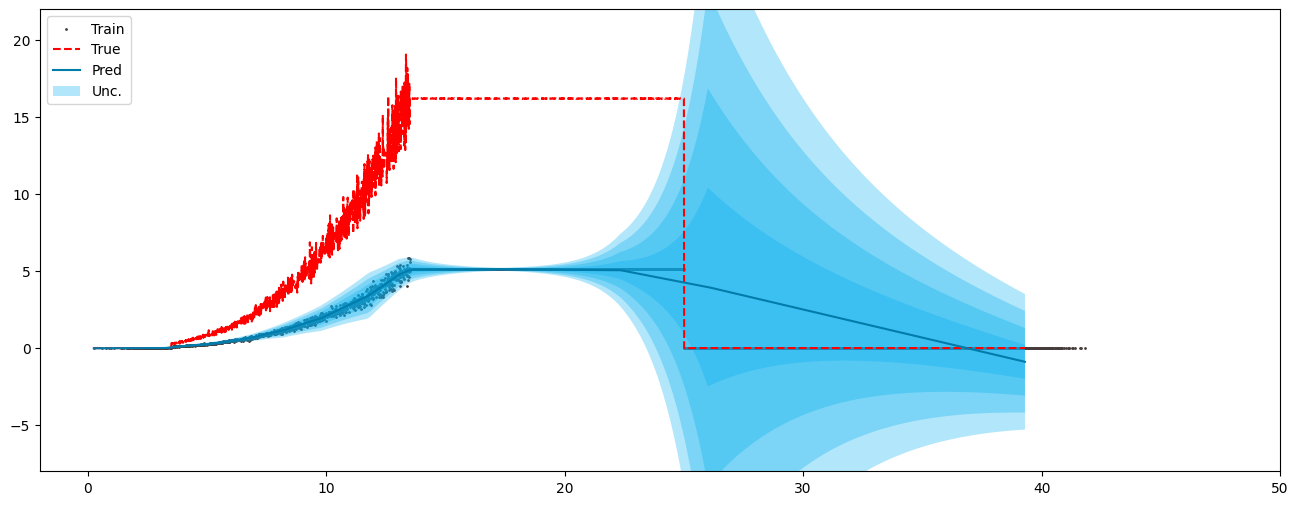

                       beta     alpha         v  Aleatoric  Epistemic  \
x Test data point                                                       
0.250000           0.002129  6.330503  3.425103   0.000399   0.000117   
0.284891           0.002106  6.337933  3.428477   0.000395   0.000115   
0.315246           0.002086  6.344397  3.431413   0.000390   0.000114   
0.351107           0.002063  6.352030  3.434880   0.000385   0.000112   
0.569736           0.001979  6.369030  3.433517   0.000369   0.000107   
...                     ...       ...       ...        ...        ...   
38.986225          0.000840  4.365624  0.000302   0.000250   0.827573   
39.089934          0.000821  4.393401  0.000299   0.000242   0.809747   
39.121791          0.000815  4.401941  0.000298   0.000240   0.804358   
39.147471          0.000811  4.408824  0.000297   0.000238   0.800044   
39.301084          0.000784  4.450039  0.000293   0.000227   0.774770   

                   total evidence  mu/prediction  

In [231]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]
df_uncertainty = get_uncertainty_estimation(y_pred, x_test)
plot_predictions(client_train_data1_x.values, client_train_data1_y.values, test_data_x.values, test_data_y.values, y_pred)
print(df_uncertainty)

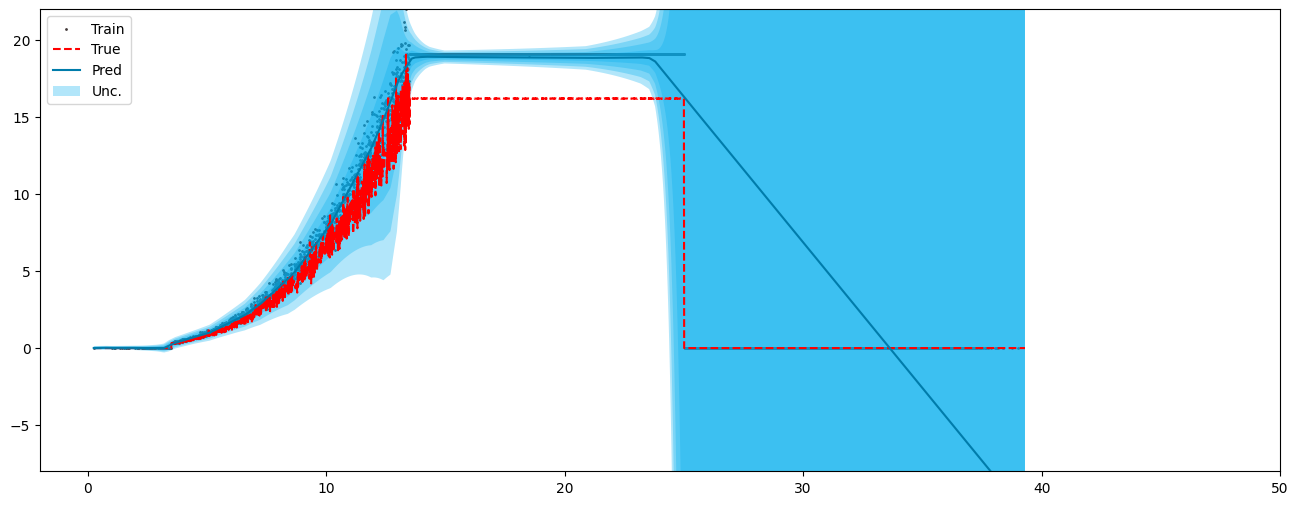

                        beta     alpha         v  Aleatoric  Epistemic  \
x Test data point                                                        
0.250000            0.004816  5.614989  1.546082   0.001044   0.000675   
0.284891            0.004750  5.622666  1.541805   0.001028   0.000666   
0.315246            0.004693  5.629344  1.538087   0.001014   0.000659   
0.351107            0.004627  5.637234  1.533701   0.000998   0.000651   
0.569736            0.004299  5.655806  1.481465   0.000923   0.000623   
...                      ...       ...       ...        ...        ...   
38.986225          54.668285  1.000000  5.695461        inf        inf   
39.089934          55.082676  1.000000  5.775083        inf        inf   
39.121791          55.209953  1.000000  5.799541        inf        inf   
39.147471          55.312565  1.000000  5.819263        inf        inf   
39.301084          55.926319  1.000000  5.937240        inf        inf   

                   total evidence  mu

In [232]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred2, 4, axis = 1) # Hyperparameters of evidential distributions

mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]

df_uncertainty = get_uncertainty_estimation(y_pred2, x_test)
plot_predictions(client_train_data2_x.values, client_train_data2_y.values, test_data_x.values, test_data_y.values, y_pred2)
print(df_uncertainty)

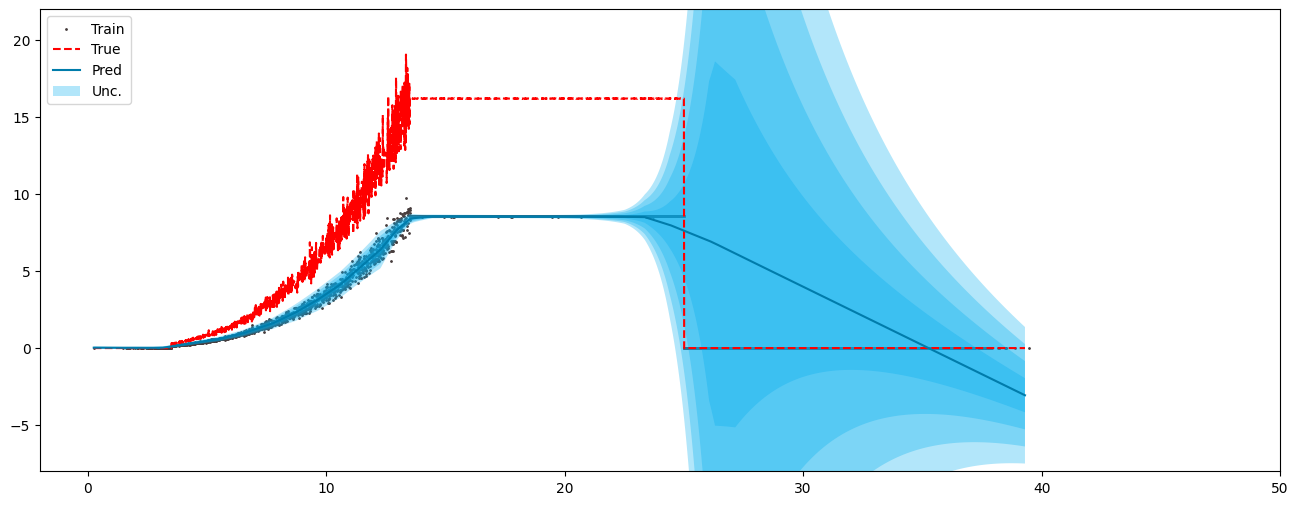

                           beta     alpha             v     Aleatoric  \
x Test data point                                                       
0.250000           4.964828e-03  7.939449  3.301928e+00  7.154499e-04   
0.284891           4.939750e-03  7.950447  3.300217e+00  7.107097e-04   
0.315246           4.918043e-03  7.960015  3.298726e+00  7.066139e-04   
0.351107           4.892514e-03  7.971321  3.296965e+00  7.018059e-04   
0.569736           4.755485e-03  8.034142  3.286829e+00  6.760576e-04   
...                         ...       ...           ...           ...   
38.986225          2.957889e-07  5.186765  8.150486e-08  7.064855e-08   
39.089934          2.786138e-07  5.223529  7.859848e-08  6.596707e-08   
39.121791          2.735402e-07  5.234825  7.772665e-08  6.459303e-08   
39.147471          2.695182e-07  5.243932  7.703078e-08  6.350673e-08   
39.301084          2.466652e-07  5.298436  7.299725e-08  5.738487e-08   

                   Epistemic  total evidence  mu/p

In [233]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred3, 4, axis = 1) # Hyperparameters of evidential distributions

mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]

df_uncertainty = get_uncertainty_estimation(y_pred3, x_test)
plot_predictions(client_train_data3_x.values, client_train_data3_y.values, test_data_x.values, test_data_y.values, y_pred3)
print(df_uncertainty)

In [40]:
for key, value in model2_parameters.items():
    print(key, value.shape)

dense_15/kernel:0 (2, 64)
dense_15/bias:0 (64,)
dense_16/kernel:0 (64, 64)
dense_16/bias:0 (64,)
dense_normal_gamma_4/dense_17/kernel:0 (64, 4)
dense_normal_gamma_4/dense_17/bias:0 (4,)


In [42]:
for key, value in model3_parameters.items():
    print(key, value.shape)

dense_24/kernel:0 (2, 64)
dense_24/bias:0 (64,)
dense_25/kernel:0 (64, 64)
dense_25/bias:0 (64,)
dense_normal_gamma_7/dense_26/kernel:0 (64, 4)
dense_normal_gamma_7/dense_26/bias:0 (4,)


In [34]:
n_clients = 2
model_group = {}
# model 1
_model_param1 = {k: tf.convert_to_tensor(v) for k, v in model_parameters.items()}
model_group = {k: v * (1.0 / n_clients) for k, v in _model_param1.items()}

# model 2
for k,v in model2_parameters.items():
    model_group[k] += v * (1.0 / n_clients)


model_group = {k: v.numpy() for k, v in model_group.items()}
model_group

KeyError: 'dense_9/kernel:0'

In [48]:
# Assuming model1_parameters and model2_parameters are dictionaries with layer names as keys
model1_params_list = list(model_parameters.values())
model2_params_list = list(model2_parameters.values())
# Check if both models have the same number of parameters
if len(model1_params_list) != len(model2_params_list):
    raise ValueError("Models have a different number of parameters")
else:
    print("Alles gut")
print(model1_params_list[1].shape)
print(model2_params_list[1].shape)

Alles gut
(64,)
(64,)


In [27]:
def save_weights_to_file(conf, model, model_path):
    model.save_weights(model_path + "/client_id_%02d.h5" % conf['use_local_id'])
    
conf = {
    'units': 64,
    'input_shape': (1,),
    'model_dir': "results",
    "use_local_id": 0,
    'round': 0
}

model_mom = "experiments_wind/"

folder_name = "experiment_1" 
dir_name = "2023_11_22"

model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)   
model_path = model_dir + "/communication_round_%03d/" % conf['round']


import shutil

if os.path.isdir(model_path):
    shutil.rmtree(model_path)
    
if not os.path.exists(os.path.dirname(model_path)):
    os.makedirs(os.path.dirname(model_path))

save_weights_to_file(conf, model1, model_path)

In [21]:
# Create a new model instance
load_model1 = create_model(conf)

if not load_model1.built:
    input_shape = conf.get('input_shape')
    if input_shape is None:
        raise ValueError("Input shape must be specified in 'conf' to build the model.")
    load_model1.build((None,) + input_shape)

load_model1.load_weights(model_path)
load_model1.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_normal_gamma_3 (Dens  (None, 4)                 260       
 eNormalGamma)                                                   
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       


In [28]:
client_models = []
for model in [model1, model2, model3]: 
    model_params = {weight.name: weight.numpy() for weight in model.weights} # extract parameters from model
    client_models.append(model_params)
print(len(client_models))

NameError: name 'model2' is not defined

In [236]:
n_clients = 3
#client_models = [model_parameters, model2_parameters, model3_parameters]  

num_params = len(client_models[0].values())
if not all(len(model.values()) == num_params for model in client_models):
    raise ValueError("All models must have the same number of parameters")

# List to hold the summed parameters
summed_params = [0] * num_params

# Iterate over each client's model parameters and sum them
for model in client_models:
    model_params_list = list(model.values())
    for i in range(num_params):
        summed_params[i] += tf.convert_to_tensor(model_params_list[i])

# Initialize model_group as an empty dictionary
model_group = {}

# Compute the average for each parameter
for i in range(num_params):
    averaged_param = summed_params[i] / n_clients
    model_group[f'param_{i}'] = averaged_param.numpy()

In [237]:
for k,v in model_group.items():
    print(k, v.shape)

param_0 (1, 64)
param_1 (64,)
param_2 (64, 64)
param_3 (64,)
param_4 (64, 4)
param_5 (4,)


In [238]:
def aggregate_the_model(conf, model_group):
    num_params = len(model_group)

    # Create a new model instance
    averaged_model = create_model(conf)

    if not averaged_model.built:
        input_shape = conf.get('input_shape')
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        averaged_model.build((None,) + input_shape)

    # Set the averaged weights
    averaged_model_weights = [model_group[f'param_{i}'] for i in range(num_params)]
    averaged_model.set_weights(averaged_model_weights)

    return averaged_model

final_model = aggregate_the_model(conf, model_group)
final_model.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 64)                128       
                                                                 
 dense_136 (Dense)           (None, 64)                4160      
                                                                 
 dense_normal_gamma_44 (Den  (None, 4)                 260       
 seNormalGamma)                                                  
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


128/128 [==============================] - 0s 294us/step


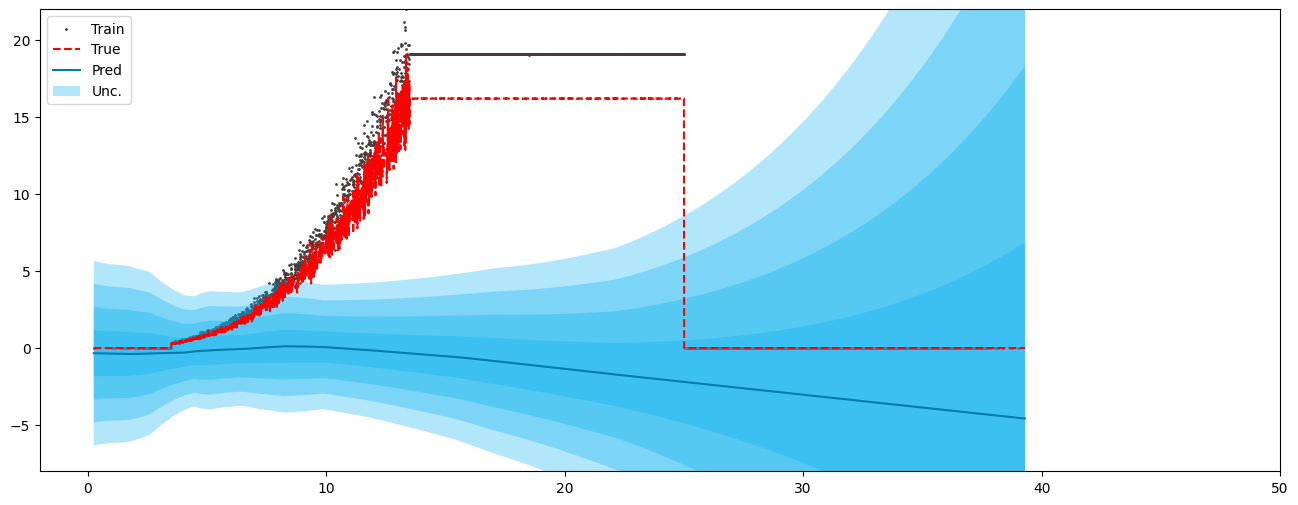

                       beta     alpha         v   Aleatoric  Epistemic  \
x Test data point                                                        
0.250000           0.471930  1.891372  0.368195    0.529443   1.437940   
0.284891           0.471436  1.891659  0.369083    0.528718   1.432518   
0.315246           0.471007  1.891910  0.369856    0.528088   1.427819   
0.351107           0.470499  1.892205  0.370772    0.527344   1.422288   
0.569736           0.468237  1.895504  0.375891    0.522875   1.391028   
...                     ...       ...       ...         ...        ...   
38.986225          2.426190  1.007094  4.341993  342.027740  78.772057   
39.089934          2.437519  1.006950  4.358609  350.696991  80.460762   
39.121791          2.441000  1.006907  4.363714  353.398132  80.985626   
39.147471          2.443808  1.006872  4.367829  355.596588  81.412659   
39.301084          2.460619  1.006668  4.392447  369.007446  84.009537   

                   total evidence  mu

In [239]:
final_prediction = final_model.predict(test_data_x.values)

x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(final_prediction, 4, axis = 1) # Hyperparameters of evidential distributions

mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]

df_uncertainty = get_uncertainty_estimation(final_prediction, x_test)
plot_predictions(client_train_data2_x.values, client_train_data2_y.values, test_data_x.values, test_data_y.values, final_prediction)
print(df_uncertainty)

In [201]:
final_prediction

array([[0.34631264, 0.733115  , 2.4621058 , 0.1099029 ],
       [0.35147518, 0.7372426 , 2.4613805 , 0.10958527],
       [0.36325198, 0.7467171 , 2.4597268 , 0.10886382],
       ...,
       [1.9138602 , 2.495076  , 6.1938887 , 0.07270993],
       [1.9202806 , 2.5118492 , 6.24429   , 0.07284679],
       [1.9226291 , 2.517991  , 6.2627316 , 0.072897  ]], dtype=float32)

In [252]:
# CLIENT 1
model1_round2 = create_model(conf)

if not model1_round2.built:
        input_shape = conf.get('input_shape')
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        model1_round2.build((None,) + input_shape)

model1_round2.set_weights(final_model.get_weights())
model1_round2.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model1_round2.fit(client_train_data1_x.values, client_train_data1_y.values,  batch_size=10, epochs=100, verbose=1)

Epoch 1/100
410/410 [==============================] - 0s 469us/step - loss: 0.4731
Epoch 2/100
410/410 [==============================] - 0s 416us/step - loss: -0.7549
Epoch 3/100
410/410 [==============================] - 0s 440us/step - loss: -1.1663
Epoch 4/100
410/410 [==============================] - 0s 422us/step - loss: -1.5442
Epoch 5/100
410/410 [==============================] - 0s 424us/step - loss: -1.6992
Epoch 6/100
410/410 [==============================] - 0s 419us/step - loss: -1.7380
Epoch 7/100
410/410 [==============================] - 0s 413us/step - loss: -1.6873
Epoch 8/100
410/410 [==============================] - 0s 421us/step - loss: -1.6603
Epoch 9/100
410/410 [==============================] - 0s 468us/step - loss: -1.6789
Epoch 10/100
410/410 [==============================] - 0s 416us/step - loss: -1.7613
Epoch 11/100
410/410 [==============================] - 0s 421us/step - loss: -1.7055
Epoch 12/100
410/410 [==============================] - 0s 426us

In [253]:
# CLIENT 2
model2_round2 = create_model(conf)

if not model2_round2.built:
        input_shape = conf.get('input_shape')
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        model2_round2.build((None,) + input_shape)

model2_round2.set_weights(final_model.get_weights())
model2_round2.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model2_round2.fit(client_train_data2_x.values, client_train_data2_y.values,  batch_size=10, epochs=100, verbose=1)

Epoch 1/100
410/410 [==============================] - 0s 461us/step - loss: 2.2009
Epoch 2/100
410/410 [==============================] - 0s 423us/step - loss: 1.3740
Epoch 3/100
410/410 [==============================] - 0s 436us/step - loss: 1.3098
Epoch 4/100
410/410 [==============================] - 0s 468us/step - loss: 1.1299
Epoch 5/100
410/410 [==============================] - 0s 447us/step - loss: 1.2552
Epoch 6/100
410/410 [==============================] - 0s 438us/step - loss: 1.0941
Epoch 7/100
410/410 [==============================] - 0s 423us/step - loss: 1.1150
Epoch 8/100
410/410 [==============================] - 0s 438us/step - loss: 1.0974
Epoch 9/100
410/410 [==============================] - 0s 410us/step - loss: 1.0509
Epoch 10/100
410/410 [==============================] - 0s 444us/step - loss: 1.1113
Epoch 11/100
410/410 [==============================] - 0s 428us/step - loss: 1.0316
Epoch 12/100
410/410 [==============================] - 0s 409us/step - lo

In [254]:
# CLIENT 3
model3_round2 = create_model(conf)

if not model3_round2.built:
        input_shape = conf.get('input_shape')
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        model3_round2.build((None,) + input_shape)

model3_round2.set_weights(final_model.get_weights())
model3_round2.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), loss=EvidentialRegressionLoss)
model3_round2.fit(client_train_data3_x.values, client_train_data3_y.values,  batch_size=10, epochs=100, verbose=1)

Epoch 1/100
410/410 [==============================] - 0s 446us/step - loss: -1.4318
Epoch 2/100
410/410 [==============================] - 0s 388us/step - loss: -1.4226
Epoch 3/100
410/410 [==============================] - 0s 409us/step - loss: -1.4210
Epoch 4/100
410/410 [==============================] - 0s 435us/step - loss: -1.3120
Epoch 5/100
410/410 [==============================] - 0s 397us/step - loss: -1.3018
Epoch 6/100
410/410 [==============================] - 0s 393us/step - loss: -1.2880
Epoch 7/100
410/410 [==============================] - 0s 440us/step - loss: -1.2835
Epoch 8/100
410/410 [==============================] - 0s 400us/step - loss: -1.3400
Epoch 9/100
410/410 [==============================] - 0s 397us/step - loss: -1.2989
Epoch 10/100
410/410 [==============================] - 0s 406us/step - loss: -1.4212
Epoch 11/100
410/410 [==============================] - 0s 413us/step - loss: -1.3378
Epoch 12/100
410/410 [==============================] - 0s 402u

In [255]:
y_pred = model1_round2(test_data_x.values)
y_pred2 = model2_round2(test_data_x.values)
y_pred3 = model3_round2(test_data_x.values)

In [256]:
print(y_pred[0:5])
print(y_pred2[0:5])
print(y_pred3[0:5])

tf.Tensor(
[[-2.1536306e-02  1.6570285e-04  9.3283453e+00  1.7932405e-06]
 [-2.1592155e-02  1.6897285e-04  9.3147831e+00  1.8238351e-06]
 [-2.1640301e-02  1.7187120e-04  9.3029861e+00  1.8508681e-06]
 [-2.1697432e-02  1.7535873e-04  9.2890491e+00  1.8833276e-06]
 [-2.2046611e-02  1.9820612e-04  9.2040796e+00  2.0939065e-06]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[-6.8601966e-02  6.1915384e-06  6.5832310e+00  8.2090857e-08]
 [-6.8467706e-02  6.1097776e-06  6.5815806e+00  8.2375216e-08]
 [-6.8351507e-02  6.0395296e-06  6.5801525e+00  8.2623210e-08]
 [-6.8213776e-02  5.9575882e-06  6.5784612e+00  8.2917168e-08]
 [-6.7375317e-02  5.4814736e-06  6.5681515e+00  8.4732733e-08]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[1.10875517e-02 2.31800557e-04 1.06578083e+01 2.35706170e-06]
 [1.07334182e-02 2.32719904e-04 1.06464281e+01 2.38682969e-06]
 [1.04254708e-02 2.33521714e-04 1.06365223e+01 2.41303815e-06]
 [1.00615472e-02 2.34472027e-04 1.06248255e+01 2.44438047e-06]
 [7.84347951e-03 2.4035

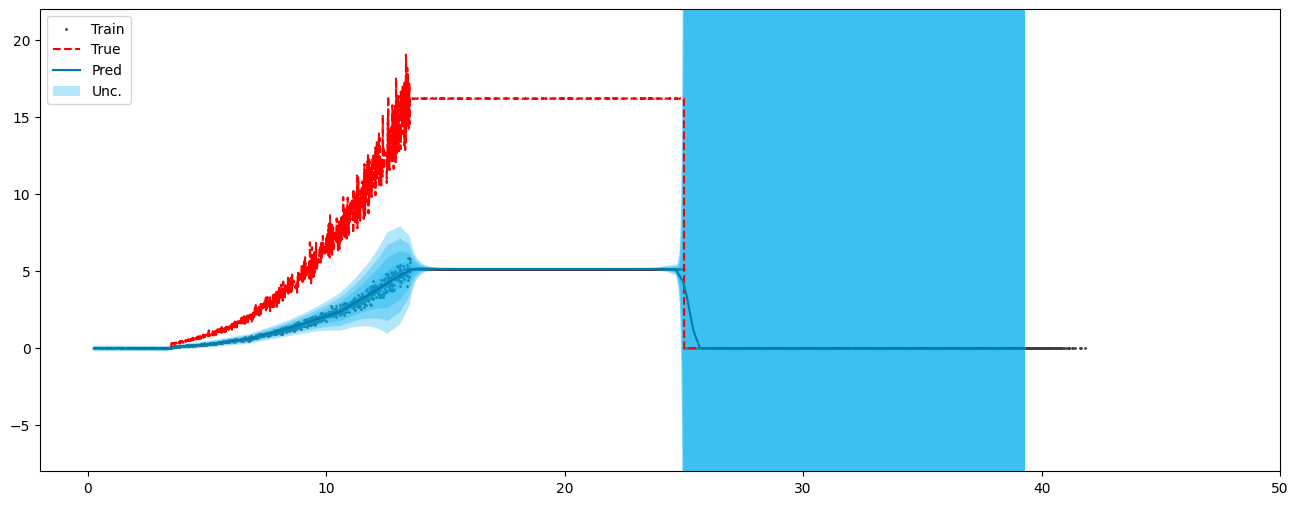

                           beta     alpha         v     Aleatoric  Epistemic  \
x Test data point                                                              
0.250000           1.793240e-06  9.328345  0.000166  2.153177e-07   0.001299   
0.284891           1.823835e-06  9.314783  0.000169  2.193485e-07   0.001298   
0.315246           1.850868e-06  9.302986  0.000172  2.229160e-07   0.001297   
0.351107           1.883328e-06  9.289049  0.000175  2.272067e-07   0.001296   
0.569736           2.093906e-06  9.204080  0.000198  2.552275e-07   0.001288   
...                         ...       ...       ...           ...        ...   
38.986225          2.298633e-07  1.000000  0.006281           inf        inf   
39.089934          2.233245e-07  1.000000  0.006109           inf        inf   
39.121791          2.213532e-07  1.000000  0.006058           inf        inf   
39.147471          2.197775e-07  1.000000  0.006016           inf        inf   
39.301084          2.105811e-07  1.00000

In [257]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]
df_uncertainty = get_uncertainty_estimation(y_pred, x_test)
plot_predictions(client_train_data1_x.values, client_train_data1_y.values, test_data_x.values, test_data_y.values, y_pred)
print(df_uncertainty)

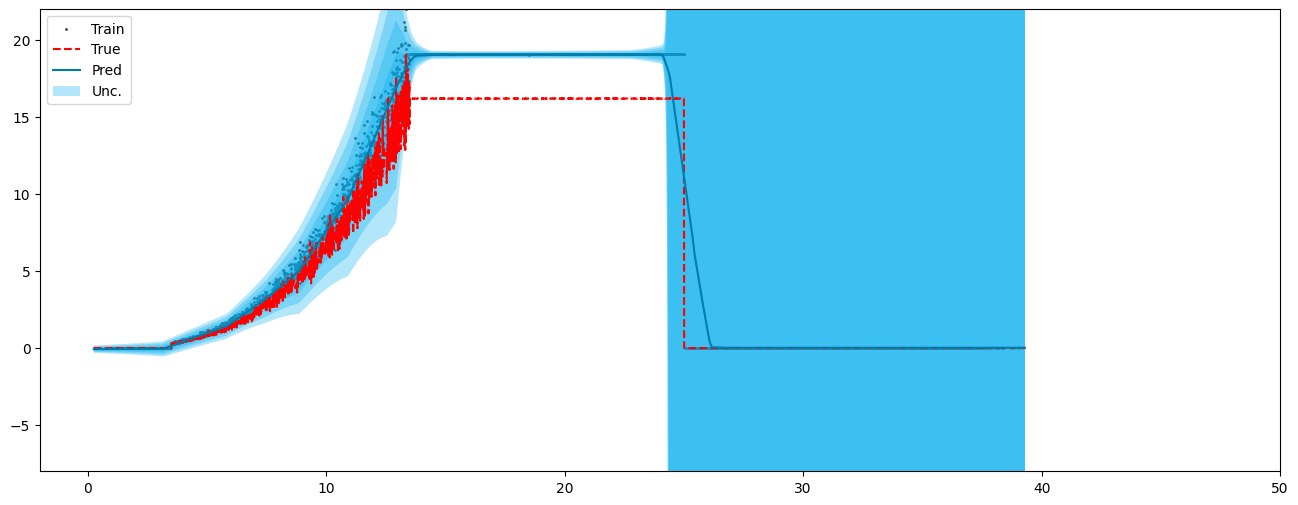

                           beta     alpha         v     Aleatoric  Epistemic  \
x Test data point                                                              
0.250000           8.209086e-08  6.583231  0.000006  1.470311e-08   0.002375   
0.284891           8.237522e-08  6.581581  0.000006  1.475840e-08   0.002416   
0.315246           8.262321e-08  6.580153  0.000006  1.480662e-08   0.002452   
0.351107           8.291717e-08  6.578461  0.000006  1.486381e-08   0.002495   
0.569736           8.473273e-08  6.568151  0.000005  1.521739e-08   0.002776   
...                         ...       ...       ...           ...        ...   
38.986225          2.608696e-08  1.000000  0.000013           inf        inf   
39.089934          2.520707e-08  1.000000  0.000013           inf        inf   
39.121791          2.494283e-08  1.000000  0.000012           inf        inf   
39.147471          2.473178e-08  1.000000  0.000012           inf        inf   
39.301084          2.350615e-08  1.00000

In [258]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred2, 4, axis = 1) # Hyperparameters of evidential distributions
mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]
df_uncertainty = get_uncertainty_estimation(y_pred2, x_test)
plot_predictions(client_train_data2_x.values, client_train_data2_y.values, test_data_x.values, test_data_y.values, y_pred2)
print(df_uncertainty)

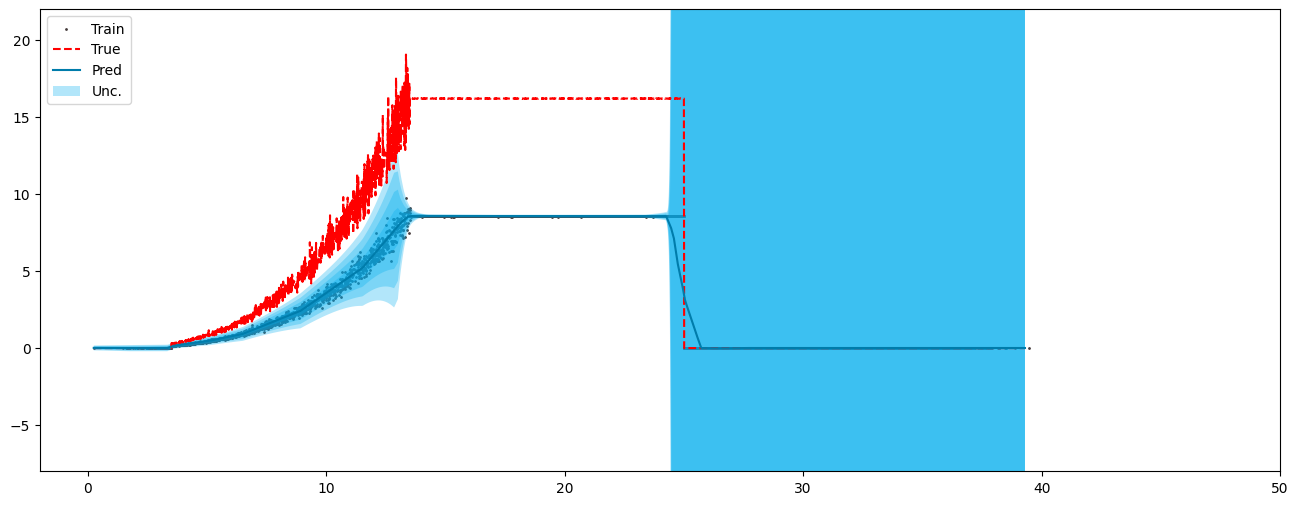

                           beta      alpha         v     Aleatoric  Epistemic  \
x Test data point                                                               
0.250000           2.357062e-06  10.657808  0.000232  2.440576e-07   0.001053   
0.284891           2.386830e-06  10.646428  0.000233  2.474314e-07   0.001063   
0.315246           2.413038e-06  10.636522  0.000234  2.504055e-07   0.001072   
0.351107           2.444380e-06  10.624825  0.000234  2.539662e-07   0.001083   
0.569736           2.644405e-06  10.553505  0.000240  2.767994e-07   0.001152   
...                         ...        ...       ...           ...        ...   
38.986225          1.039691e-06   1.000000  0.004374           inf        inf   
39.089934          1.014951e-06   1.000000  0.004260           inf        inf   
39.121791          1.007471e-06   1.000000  0.004225           inf        inf   
39.147471          1.001482e-06   1.000000  0.004198           inf        inf   
39.301084          9.663908e

In [259]:
x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(y_pred3, 4, axis = 1) # Hyperparameters of evidential distributions
mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]
df_uncertainty = get_uncertainty_estimation(y_pred3, x_test)
plot_predictions(client_train_data3_x.values, client_train_data3_y.values, test_data_x.values, test_data_y.values, y_pred3)
print(df_uncertainty)

In [260]:
client_models_round2 = []
for model in [model1_round2, model2_round2, model3_round2]: 
    model_params = {weight.name: weight.numpy() for weight in model.weights} # extract parameters from model
    client_models_round2.append(model_params)
print(len(client_models_round2))

3


In [261]:
n_clients = 3
client_models = client_models_round2

num_params = len(client_models[0].values())
if not all(len(model.values()) == num_params for model in client_models):
    raise ValueError("All models must have the same number of parameters")

# List to hold the summed parameters
summed_params = [0] * num_params

# Iterate over each client's model parameters and sum them
for model in client_models:
    model_params_list = list(model.values())
    for i in range(num_params):
        summed_params[i] += tf.convert_to_tensor(model_params_list[i])

# Initialize model_group as an empty dictionary
model_group = {}

# Compute the average for each parameter
for i in range(num_params):
    averaged_param = summed_params[i] / n_clients
    model_group[f'param_{i}'] = averaged_param.numpy()

In [262]:
final_model = evaluate_aggregated_model(conf, model_group)
final_model.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_150 (Dense)           (None, 64)                128       
                                                                 
 dense_151 (Dense)           (None, 64)                4160      
                                                                 
 dense_normal_gamma_49 (Den  (None, 4)                 260       
 seNormalGamma)                                                  
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [264]:
import pandas as pd

# Combining X data (features)
combined_train_data_x = pd.concat([client_train_data1_x, client_train_data2_x, client_train_data3_x], ignore_index=True)

# Combining Y data (labels)
combined_train_data_y = pd.concat([client_train_data1_y, client_train_data2_y, client_train_data3_y], ignore_index=True)

128/128 [==============================] - 0s 272us/step


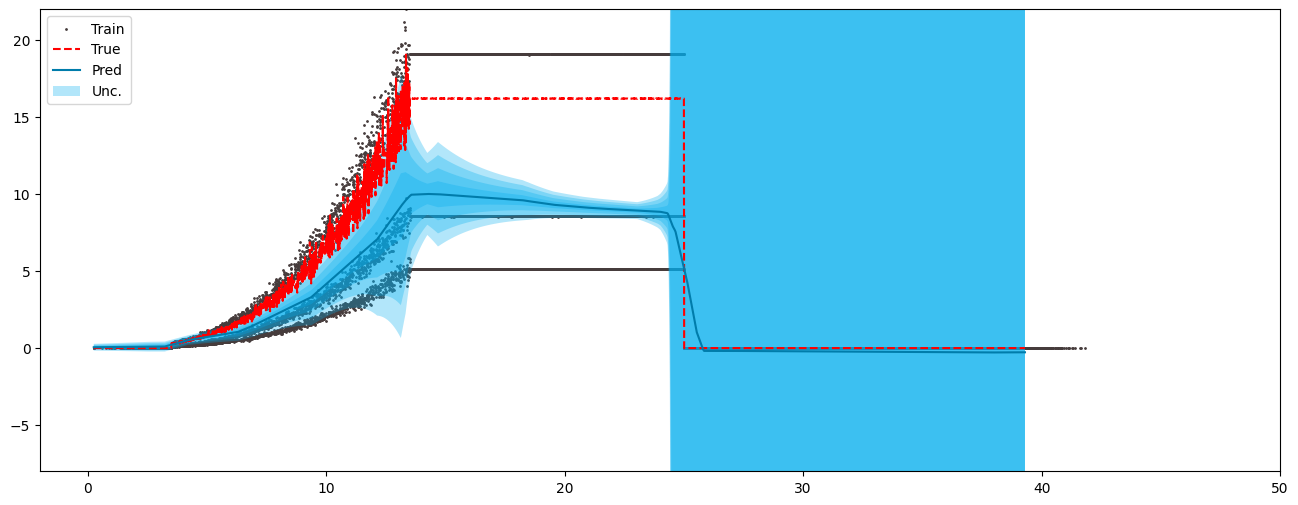

                           beta     alpha         v     Aleatoric  Epistemic  \
x Test data point                                                              
0.250000           7.575272e-07  9.202379  0.000047  9.235457e-08   0.001973   
0.284891           7.666511e-07  9.193214  0.000047  9.357147e-08   0.001994   
0.315246           7.746798e-07  9.185237  0.000047  9.464354e-08   0.002013   
0.351107           7.842729e-07  9.175814  0.000047  9.592597e-08   0.002035   
0.569736           8.453817e-07  9.118379  0.000048  1.041318e-07   0.002175   
...                         ...       ...       ...           ...        ...   
38.986225          9.752268e-07  1.000000  0.000588           inf        inf   
39.089934          9.120819e-07  1.000000  0.000584           inf        inf   
39.121791          8.935208e-07  1.000000  0.000583           inf        inf   
39.147471          8.788315e-07  1.000000  0.000583           inf        inf   
39.301084          7.958761e-07  1.00000

In [265]:
final_prediction = final_model.predict(test_data_x.values)

x_test = test_data_x.values[:, 0]
mu, v, alpha, beta = tf.split(final_prediction, 4, axis = 1) # Hyperparameters of evidential distributions

mu = mu[:, 0]
var = np.sqrt(beta / (v * (alpha - 1)))#
var = np.minimum(var, 1e3)[:, 0]

df_uncertainty = get_uncertainty_estimation(final_prediction, x_test)
plot_predictions(combined_train_data_x.values, combined_train_data_y.values, test_data_x.values, test_data_y.values, final_prediction)
print(df_uncertainty)

In [15]:
import pandas as pd

def get_wind_train_dataset(conf):
    local_id = conf["use_local_id"]
    train_dataset_client = []

    # Read in subset based on local_id
    with open(f'clients_single_blade/client_{local_id}.json', 'r') as f:
            train_dataset_client = pd.read_json(f, orient='records', lines=True)

    # Convert JSON string to DataFrame
    
    return train_dataset_client


conf = {
        "use_local_id": 1,
        "round": 0,
        "batch_size": 1024,
        "sigma": 0,
        "num_local_epochs": 100,
        "lr": 0.1,
        'units': 64,
        "model_dir": "/results/communication_round_%02d" % 0,
    }


clinet = get_wind_train_dataset(conf)

In [3]:
clinet

1, debugg
2. Centralised learning
3. Local models performance
4. GPUs
5. Compare performances
6. Increase model complexity

,x_values,x_wind_speed,y_ground_truth,observed_data,model,Wind Speed (m/s),Blade Length (m),Power Output (W),Power Output (kW),Power Output (MW)
0,1.117216,0.250000,2.365751,1.515328,5.513380,0.250000,90,0.0,0.0,0.0
1,0.230769,0.260911,0.885385,4.310733,7.395441,0.260911,90,0.0,0.0,0.0
2,0.153846,0.650815,0.756923,0.301352,1.802739,0.650815,90,0.0,0.0,0.0
3,0.311355,0.852727,1.019963,0.568796,0.673920,0.852727,90,0.0,0.0,0.0
4,0.219780,0.929724,0.867033,1.735104,5.895374,0.929724,90,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4091,14.633700,30.142192,24.938278,73.996288,55.561724,30.142192,90,0.0,0.0,0.0
4092,14.956044,30.165765,25.476593,77.518938,54.355243,30.165765,90,0.0,0.0,0.0
4093,14.879121,30.352063,25.348132,78.554909,46.149995,30.352063,90,0.0,0.0,0.0
4094,14.974359,30.362808,25.507179,78.211897,54.075537,30.362808,90,0.0,0.0,0.0


In [7]:
load_model = fl_utils.initial_model_tensorflow()
        
if not load_model.built:
    input_shape = (1,)
    if input_shape is None:
        raise ValueError("Input shape must be specified in 'conf' to build the model.")
    load_model.build((None,) + input_shape)


print(load_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_normal_gamma (DenseN  (None, 4)                 260       
 ormalGamma)                                                     
                                                                 
Total params: 4548 (17.77 KB)
Trainable params: 4548 (17.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import os
import torch 
import fl_utils as fl_utils 
import torch.nn as nn 
import get_data as gd
import tensorflow as tf
import evidential_deep_learning as edl
from torch.optim import Adam
import torch.nn.functional as F



In [74]:
import pickle

file_path = "/Users/matijasipek/Desktop/DTU/Deep Learning/federated_learning/fl_example wind/experiments_wind/experiment_1/2023_11_27/stat.obj"

with open(file_path, 'rb') as f:
    data = pickle.load(f)

# Now `data` contains the deserialized object.

In [75]:
data = pd.DataFrame(data)
display(data)

,server_mse,server_uncertainty,server_edl_loss
0,28.017731,beta alpha ...,"tf.Tensor(4.9957895, shape=(), dtype=float32)"
1,12.071514,beta alpha ...,"tf.Tensor(2.7550871, shape=(), dtype=float32)"
2,7.647441,beta alpha ...,"tf.Tensor(2.573011, shape=(), dtype=float32)"
3,6.012227,beta alpha ...,"tf.Tensor(2.2373703, shape=(), dtype=float32)"
4,5.496177,beta alpha ...,"tf.Tensor(2.1967425, shape=(), dtype=float32)"
5,5.386599,beta alpha ...,"tf.Tensor(2.082498, shape=(), dtype=float32)"
6,5.586285,beta alpha ...,"tf.Tensor(2.1130984, shape=(), dtype=float32)"
7,5.922031,beta alpha ...,"tf.Tensor(2.2573302, shape=(), dtype=float32)"
8,5.606251,beta alpha ...,"tf.Tensor(2.19526, shape=(), dtype=float32)"
9,5.901922,beta alpha ...,"tf.Tensor(2.1577282, shape=(), dtype=float32)"


In [76]:
server_edl_loss = data['server_edl_loss']
server_edl_loss

0      tf.Tensor(4.9957895, shape=(), dtype=float32)
1      tf.Tensor(2.7550871, shape=(), dtype=float32)
2       tf.Tensor(2.573011, shape=(), dtype=float32)
3      tf.Tensor(2.2373703, shape=(), dtype=float32)
4      tf.Tensor(2.1967425, shape=(), dtype=float32)
5       tf.Tensor(2.082498, shape=(), dtype=float32)
6      tf.Tensor(2.1130984, shape=(), dtype=float32)
7      tf.Tensor(2.2573302, shape=(), dtype=float32)
8        tf.Tensor(2.19526, shape=(), dtype=float32)
9      tf.Tensor(2.1577282, shape=(), dtype=float32)
10     tf.Tensor(2.1141267, shape=(), dtype=float32)
11     tf.Tensor(2.0483031, shape=(), dtype=float32)
12     tf.Tensor(1.9812025, shape=(), dtype=float32)
13      tf.Tensor(1.990809, shape=(), dtype=float32)
14     tf.Tensor(1.6990718, shape=(), dtype=float32)
15     tf.Tensor(1.7584788, shape=(), dtype=float32)
16     tf.Tensor(1.6850059, shape=(), dtype=float32)
17     tf.Tensor(1.5628984, shape=(), dtype=float32)
18     tf.Tensor(1.4773449, shape=(), dtype=fl

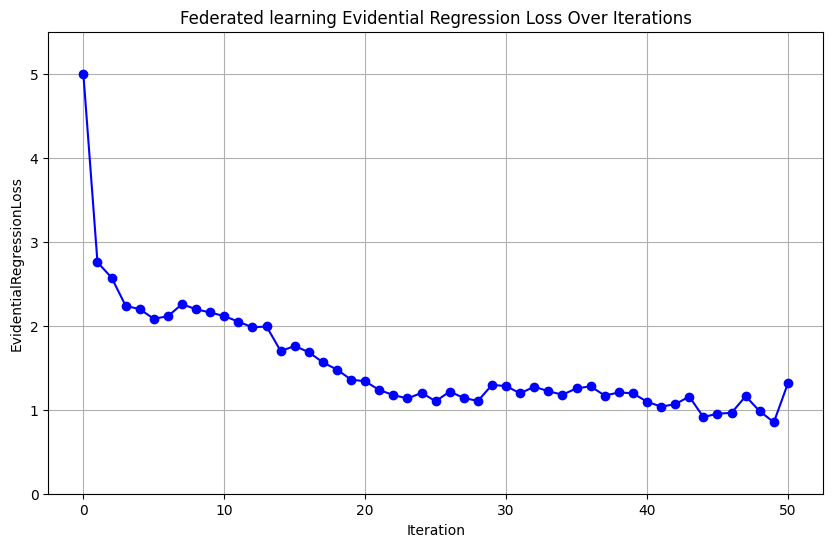

In [77]:
# Assuming 'server_mse' is a Pandas Series or a list containing the MSE values
server_mse = data['server_edl_loss']

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plotting the MSE values
plt.plot(server_mse, marker='o', linestyle='-', color='b')  # 'o' is for circular markers

# Adding title and labels
plt.title('Federated learning Evidential Regression Loss Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('EvidentialRegressionLoss')

# Optionally, you can add grid for better readability
plt.grid(True)
plt.ylim([0, 5.5])


# Show the plot
plt.show()


In [24]:
server_uncertainty = data['server_uncertainty']
display(server_uncertainty[0])
display(server_uncertainty[1])
display(server_uncertainty[2])
display(server_uncertainty[3])

0    11.219549
1    11.275499
2     8.158337
3     3.550334
4     4.355509
Name: server_mse, dtype: float64

,beta,alpha,v,Aleatoric,Epistemic,total evidence,mu/prediction
x Test data point,,,,,,,
0.250000,0.697365,1.688389,0.686802,1.013039,1.475009,3.061993,0.016045
0.496424,0.696756,1.688157,0.687082,1.012495,1.473617,3.062320,0.015364
0.649006,0.696433,1.688007,0.687196,1.012247,1.473010,3.062399,0.014945
0.760477,0.696190,1.687891,0.687295,1.012064,1.472533,3.062480,0.014579
0.851435,0.695991,1.687777,0.687380,1.011944,1.472176,3.062536,0.014301
...,...,...,...,...,...,...,...
28.840463,0.647616,1.650642,0.714214,0.995349,1.393629,3.079069,-0.063920
28.893890,0.647526,1.650573,0.714265,0.995317,1.393484,3.079103,-0.064070
28.909415,0.647500,1.650553,0.714280,0.995308,1.393442,3.079113,-0.064114


,beta,alpha,v,Aleatoric,Epistemic,total evidence,mu/prediction
x Test data point,,,,,,,
0.250000,0.700051,1.688130,0.684520,1.017323,1.486184,3.057171,0.012855
0.496424,0.701024,1.688197,0.683714,1.018639,1.489863,3.055624,0.012075
0.649006,0.701609,1.688201,0.683171,1.019482,1.492279,3.054544,0.011649
0.760477,0.702043,1.688191,0.682776,1.020128,1.494089,3.053742,0.011335
0.851435,0.702407,1.688190,0.682443,1.020658,1.495596,3.053076,0.011064
...,...,...,...,...,...,...,...
28.840463,0.832842,1.687506,0.587265,1.211396,2.062775,2.862037,-0.079138
28.893890,0.833106,1.687505,0.587093,1.211782,2.064037,2.861691,-0.079310
28.909415,0.833183,1.687504,0.587043,1.211894,2.064404,2.861591,-0.079360


,beta,alpha,v,Aleatoric,Epistemic,total evidence,mu/prediction
x Test data point,,,,,,,
0.250000,0.741068,1.659063,0.652537,1.124427,1.723163,2.964136,0.058527
0.496424,0.751670,1.652494,0.645026,1.151995,1.785967,2.942547,0.066529
0.649006,0.758249,1.648462,0.640364,1.169303,1.825998,2.929189,0.071522
0.760477,0.763076,1.645524,0.636976,1.182103,1.855806,2.919476,0.075166
0.851435,0.767026,1.643134,0.634230,1.192638,1.880452,2.911593,0.078133
...,...,...,...,...,...,...,...
28.840463,2.508787,1.175570,0.139356,14.289420,102.539192,1.454281,0.960047
28.893890,2.512788,1.175094,0.138915,14.351060,103.308434,1.452924,0.961730
28.909415,2.513951,1.174956,0.138787,14.369010,103.532951,1.452530,0.962219


,beta,alpha,v,Aleatoric,Epistemic,total evidence,mu/prediction
x Test data point,,,,,,,
0.250000,0.801186,1.622560,0.614437,1.286923,2.094476,2.851433,0.162371
0.496424,0.826616,1.608397,0.600044,1.358678,2.264297,2.808485,0.191853
0.649006,0.842581,1.599732,0.591270,1.404930,2.376124,2.782271,0.210140
0.760477,0.854368,1.593458,0.584919,1.439644,2.461269,2.763297,0.223499
0.851435,0.864063,1.588375,0.579775,1.468559,2.532981,2.747925,0.234400
...,...,...,...,...,...,...,...
28.840463,5.502398,1.023734,0.021139,231.839874,10967.332031,1.066012,3.564498
28.893890,5.512248,1.023577,0.020996,233.795547,11135.428711,1.065569,3.570856
28.909415,5.515109,1.023532,0.020954,234.367218,11184.766602,1.065440,3.572703


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import json
import os
import torch 
import fl_utils as fl_utils 
import torch.nn as nn 
import get_data as gd
import tensorflow as tf
import evidential_deep_learning as edl
from torch.optim import Adam
import torch.nn.functional as F

In [4]:
test_data = []

# Read in subset based on local_id
with open(f'clients_single_blade/test_data.json', 'r') as f:
        test_data = pd.read_json(f, orient='records', lines=True)

test_data

,x_values,x_wind_speed,y_ground_truth,observed_data,model,Wind Speed (m/s),Blade Length (m),Power Output (W),Power Output (kW),Power Output (MW)
0,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,64,0.0,0.0,0.0
1,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,75,0.0,0.0,0.0
2,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,79,0.0,0.0,0.0
3,0.035165,0.250000,0.558725,4.054399,4.573472,0.250000,91,0.0,0.0,0.0
4,0.234432,0.740672,0.891502,4.282732,2.930620,0.740672,64,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16379,15.382662,32.657367,26.189045,80.196370,52.349112,32.657367,91,0.0,0.0,0.0
16380,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,64,0.0,0.0,0.0
16381,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,75,0.0,0.0,0.0
16382,15.796825,32.785541,26.880698,85.070610,56.641857,32.785541,79,0.0,0.0,0.0


In [5]:
# TOOooooOOOOOOOOOOOOOOOOOOOOOOO
##### load all data
train_dataset_client = []

# Read in subset based on local_id
for i in range(10):
    local_id = i
    with open(f'clients_single_blade/client_{local_id}.json', 'r') as f:
            train_dataset_client.append(pd.read_json(f, orient='records', lines=True))
    
print(len(train_dataset_client))


10


In [6]:
# Define global lists
wind_speeds = []
blade_lengths = []
power_outputs = []

# Iterate over each DataFrame in the list
for df in train_dataset_client:
    # Extract the columns and add them to the global lists
    wind_speeds.append(df['Wind Speed (m/s)'])
    blade_lengths.append(df['Blade Length (m)'])
    power_outputs.append(df['Power Output (MW)'])

combined_wind_speeds = pd.concat(wind_speeds, ignore_index=True)
combined_blade_lengths = pd.concat(blade_lengths, ignore_index=True)
combined_power_outputs = pd.concat(power_outputs, ignore_index=True)

In [7]:
combined_wind_speeds

0          0.250000
1          0.250000
2          0.250000
3          0.250000
4          1.186398
            ...    
163835    39.364800
163836    39.874210
163837    39.874210
163838    39.874210
163839    39.874210
Name: Wind Speed (m/s), Length: 163840, dtype: float64

In [80]:
model_mom = "experiments_wind/"

folder_name = "experiment_1" 
dir_name = "2023_11_27"

model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)     


model_path = model_dir + "communication_round_%03d/" % (50) + "/aggregated_model.pt"
exist_model = tf.keras.models.load_model(model_path, custom_objects={'EvidentialRegressionLoss': EvidentialRegressionLoss})

df_blade_length_75 = test_data[test_data['Blade Length (m)'] == 75]
text_data_x_75 = df_blade_length_75[['Wind Speed (m/s)', 'Blade Length (m)']]
text_data_y_75 = df_blade_length_75['Power Output (MW)']



final_prediction = exist_model.predict(text_data_x_75.values)
# print(test_data_x.values)
# print(test_data_y.values)

#print(df_uncertainty)

128/128 [==============================] - 0s 303us/step


/var/folders/nx/b6bfmd5s0tngchr9m2kgpqf00000gn/T/ipykernel_34093/2549843409.py:49: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


AttributeError: 'Line2D' object has no attribute 'set_sizes'

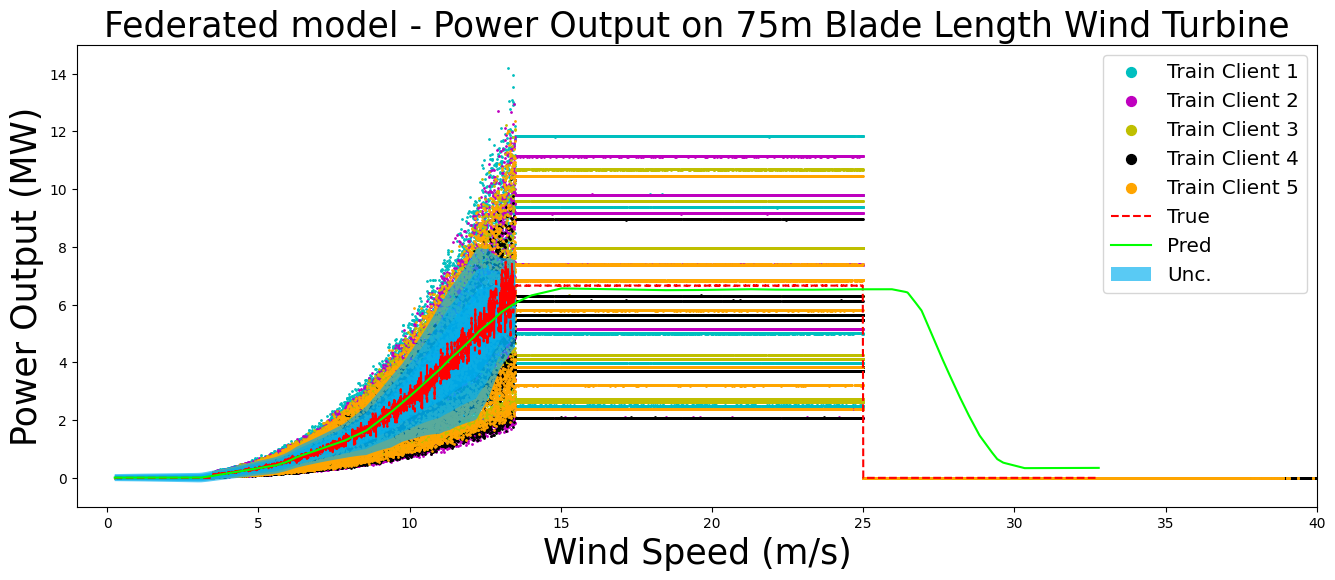

In [92]:
plot_predictions3(combined_wind_speeds.values, combined_power_outputs.values, text_data_x_75.values, text_data_y_75.values, final_prediction)


In [91]:
import matplotlib.pyplot as plt

def plot_predictions3(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0
    plt.figure(figsize=(16, 6), dpi=100)

    client_num = 0
    # Create a list of colors for the plot
    colors = ['c', 'm', 'y', 'k', 'orange', 'purple', 'brown']    # Plot each client's data in a different color
    for i in range(0, len(x_train), (4096*8)):
        client_index = i // 4096*8
        client_num += 1
        plt.scatter(x_train[i:i+4096*8], y_train[i:i+4096*8], s=1., c=colors[client_index % len(colors)], zorder=0, label=f"Train Client {client_num}")

    plt.plot(x_test_wind_speed, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test_wind_speed, mu, color='lime', zorder=3, label="Pred") # prediction line

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.65,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
        
    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 40)
    plt.legend(loc="upper left")
    plt.xlabel('Wind Speed (m/s)', fontsize=25)
    plt.ylabel('Power Output (MW)', fontsize=25)
    plt.title('Federated model - Power Output on 75m Blade Length Wind Turbine', fontsize=25)
    # Create the legend with larger font size
    legend = plt.legend(loc='upper right', fontsize='x-large')

    # Increase the size of the legend markers
    for handle in legend.legendHandles:
        handle.set_sizes([50])  # adjust as necessary

    plt.show()




def plot_predictions4(x_test, y_pred, n_stds=4):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0

    plt.figure(figsize=(16, 6), dpi=100)

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.5,  # Increase alpha to make the fill less transparent
            edgecolor=None,
            facecolor='orange',  # Change facecolor to a more visible color
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)

    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 30)
    plt.legend(loc="upper left")
    plt.show()

# centralized model

In [8]:
# Define global lists
wind_speeds = []
blade_lengths = []
power_outputs = []

# Iterate over each DataFrame in the list
for df in train_dataset_client:
    # Extract the columns and add them to the global lists
    wind_speeds.append(df['Wind Speed (m/s)'])
    blade_lengths.append(df['Blade Length (m)'])
    power_outputs.append(df['Power Output (MW)'])

combined_wind_speeds = pd.concat(wind_speeds, ignore_index=True)
combined_blade_lengths = pd.concat(blade_lengths, ignore_index=True)
combined_power_outputs = pd.concat(power_outputs, ignore_index=True)
x_train_blade_length = pd.concat([combined_wind_speeds, combined_blade_lengths], axis=1)

In [9]:
x_train_blade_length

,Wind Speed (m/s),Blade Length (m)
0,0.250000,57
1,0.250000,65
2,0.250000,91
3,0.250000,100
4,1.186398,57
...,...,...
163835,39.364800,76
163836,39.874210,45
163837,39.874210,52
163838,39.874210,76


In [22]:
combined_power_outputs

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
163835    0.0
163836    0.0
163837    0.0
163838    0.0
163839    0.0
Name: Power Output (MW), Length: 163840, dtype: float64

In [10]:
def initial_model_tensorflow():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        edl.layers.DenseNormalGamma(1)
    ])
    return model

In [59]:
centralized_model = initial_model_tensorflow() 
if not centralized_model.built: 
        input_shape = (2,)
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        centralized_model.build((None,) + input_shape)


centralized_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(5e-4), 
                          loss=EvidentialRegressionLoss, 
                          metrics=[tf.keras.metrics.MeanSquaredError()])
model_trained = centralized_model.fit(x_train_blade_length.values, combined_power_outputs.values,  batch_size=1024, epochs=51, verbose=1)


Epoch 1/51
160/160 [==============================] - 0s 894us/step - loss: 2.3199 - mean_squared_error: 15.8892
Epoch 2/51
160/160 [==============================] - 0s 930us/step - loss: 1.9228 - mean_squared_error: 15.0739
Epoch 3/51
160/160 [==============================] - 0s 957us/step - loss: 1.8746 - mean_squared_error: 15.0858
Epoch 4/51
160/160 [==============================] - 0s 936us/step - loss: 1.8372 - mean_squared_error: 15.0800
Epoch 5/51
160/160 [==============================] - 0s 940us/step - loss: 1.8011 - mean_squared_error: 15.0660
Epoch 6/51
160/160 [==============================] - 0s 931us/step - loss: 1.7682 - mean_squared_error: 15.0527
Epoch 7/51
160/160 [==============================] - 0s 930us/step - loss: 1.7391 - mean_squared_error: 15.0451
Epoch 8/51
160/160 [==============================] - 0s 954us/step - loss: 1.7146 - mean_squared_error: 15.0305
Epoch 9/51
160/160 [==============================] - 0s 1ms/step - loss: 1.6974 - mean_squared_

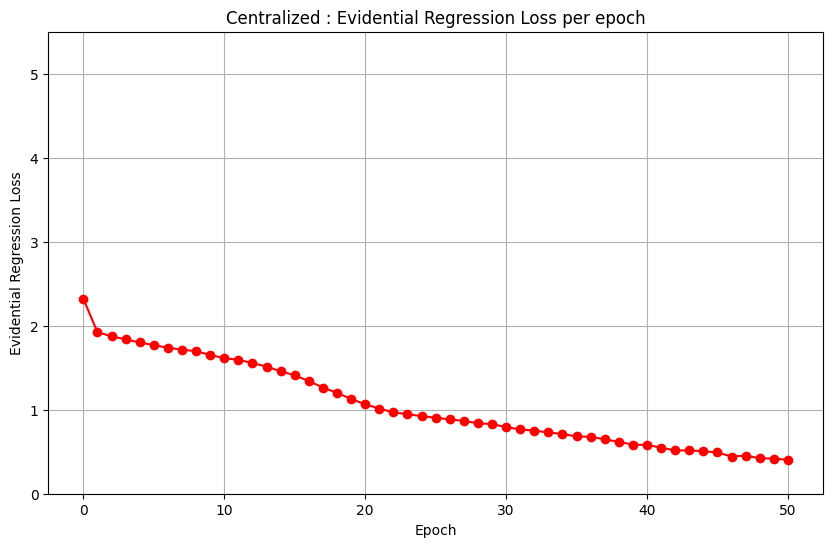

In [60]:
# Extract loss values
loss_values = model_trained.history['loss']

# Create a figure
plt.figure(figsize=(10, 6))
plt.grid(True)

# Plot for loss
plt.plot(loss_values, color='red', marker='o', linestyle='-', label='Loss')
plt.title('Centralized : Evidential Regression Loss per epoch')
plt.xlabel('Epoch')
plt.ylabel('Evidential Regression Loss')
plt.ylim([0, 5.5])

# Show the plot
plt.show()

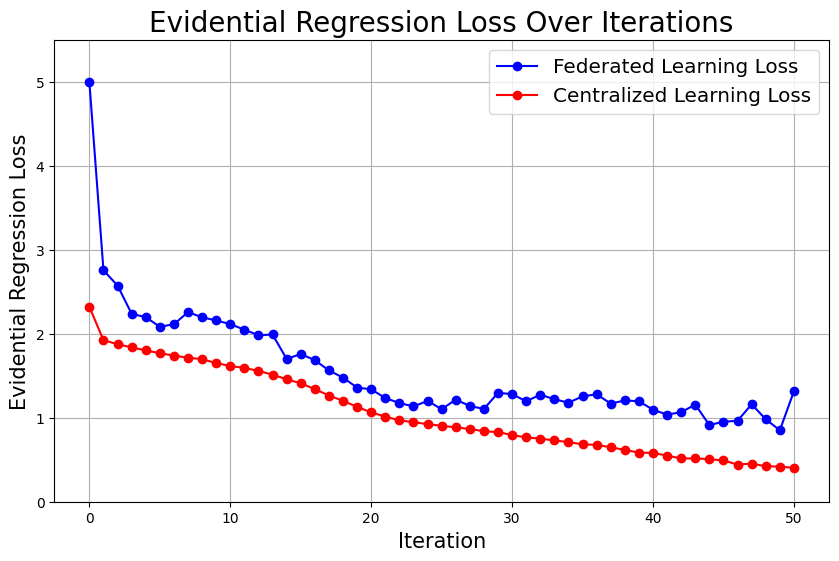

In [61]:
# Assuming 'server_mse' is a Pandas Series or a list containing the MSE values
server_mse = data['server_edl_loss']

# Extract loss values
loss_values = model_trained.history['loss']

# Create a new figure and axis
plt.figure(figsize=(10, 6))

# Plotting the server MSE values
plt.plot(server_mse, marker='o', linestyle='-', color='b', label='Federated Learning Loss')  # 'o' is for circular markers

# Plotting the loss values
plt.plot(loss_values, color='red', marker='o', linestyle='-', label='Centralized Learning Loss')

# Adding title and labels
plt.title('Evidential Regression Loss Over Iterations', fontsize=20)
plt.xlabel('Iteration', fontsize=15)
plt.ylabel('Evidential Regression Loss', fontsize=15)

# Optionally, you can add grid for better readability
plt.grid(True)
plt.ylim([0, 5.5])

# Add a legend
plt.legend(fontsize='x-large')

# Show the plot
plt.show()

In [52]:
df_blade_length_75 = test_data[test_data['Blade Length (m)'] == 75]

In [62]:
test_data_x = test_data[['Wind Speed (m/s)', 'Blade Length (m)']]
test_data_y = test_data['Power Output (MW)']
###
text_data_x_75 = df_blade_length_75[['Wind Speed (m/s)', 'Blade Length (m)']]
text_data_y_75 = df_blade_length_75['Power Output (MW)']

centralized_prediction = centralized_model.predict(text_data_x_75.values)

128/128 [==============================] - 0s 283us/step


In [93]:
def plot_predictions2(x_train, y_train, x_test, y_test, y_pred, n_stds=4, kk=0):
    mu, v, alpha, beta = tf.split(y_pred, 4, axis = 1) # Hyperparameters of evidential distributions
    mu = mu[:, 0]
    var = np.sqrt(beta / (v * (alpha - 1)))#variance of the evidential distribution ; Students-t distribution
    var = np.minimum(var, 1e3)[:, 0] # clip variance for plotting

    # Select only the wind speed column from x_test
    x_test_wind_speed = x_test[:, 0]

    # Set uncertainty to 0 for x_test_wind_speed values above 13.5
    mask = x_test_wind_speed > 13.5
    var[mask] = 0

    plt.figure(figsize=(16, 6), dpi=100)
    plt.scatter(x_train, y_train, s=1., c='#463c3c', zorder=0, label="Train")
    plt.plot(x_test_wind_speed, y_test, 'r--', zorder=2, label="True")
    plt.plot(x_test_wind_speed, mu, color='lime', zorder=3, label="Pred")

    # Uncertainty epistemic   
    for k in np.linspace(0, n_stds+1, 4+1):
        plt.fill_between(
            x_test_wind_speed, (mu - k * var), (mu + k * var),
            alpha=0.3,
            edgecolor=None,
            facecolor='#00aeef',
            linewidth=0,
            zorder=1,
            label="Unc." if k == 0 else None)
    plt.xlabel('Wind Speed (m/s)', fontsize=25)
    plt.ylabel('Power Output (MW)', fontsize=25)
    plt.title('Centralized model - Power Output on 75m Blade Length Wind Turbine', fontsize=25)
    # Create the legend with larger font size
    legend = plt.legend(fontsize='x-large')

    # Increase the size of the legend markers
    for handle in legend.legendHandles:
        handle.set_sizes([50])  # adjust as necessary

    plt.gca().set_ylim(-1, 15)
    plt.gca().set_xlim(-1, 30)
    plt.legend(loc="upper left")
    plt.show()

/var/folders/nx/b6bfmd5s0tngchr9m2kgpqf00000gn/T/ipykernel_34093/3088907075.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


AttributeError: 'Line2D' object has no attribute 'set_sizes'

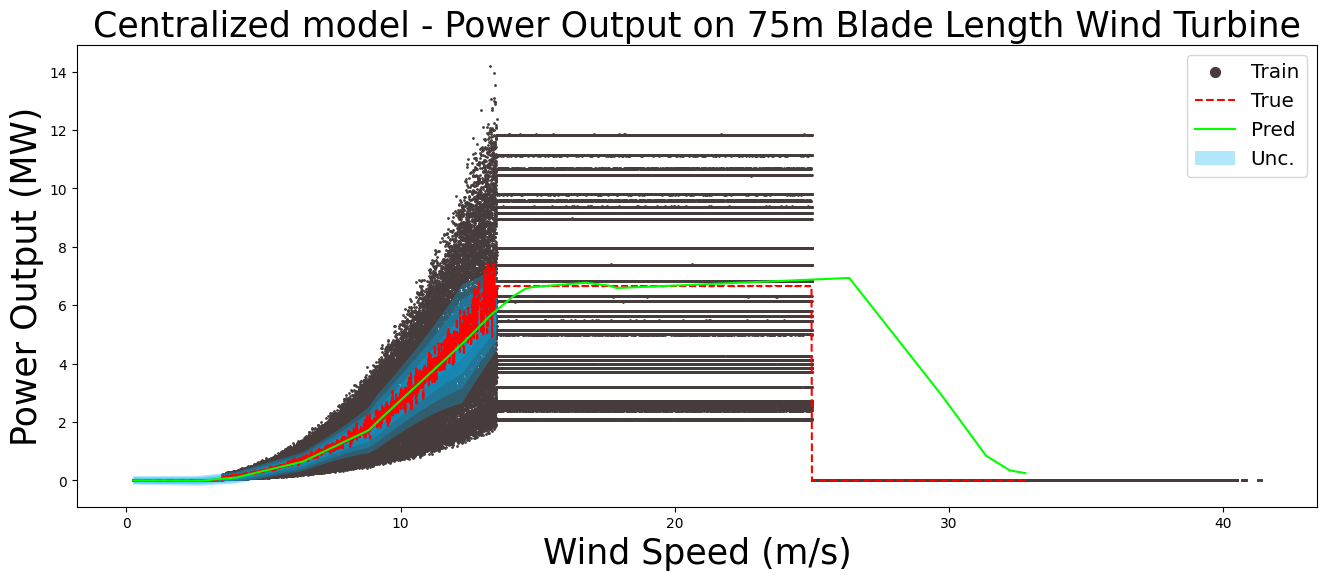

In [94]:
plot_predictions2(combined_wind_speeds.values, combined_power_outputs.values, text_data_x_75.values, text_data_y_75.values, centralized_prediction)

In [12]:
def get_uncertainty_estimation2(predictions, x_test):
    x_test = x_test[:, 0]
    # extract parameters from NIG (normal inverse-gamma)
    mu, v, alpha, beta = tf.split(predictions, 4, axis=1)
    mu = mu[:, 0]
    aleatoric_uncertainty = (beta / (alpha - 1))
    epistemic_uncertainty = (beta / (v * (alpha - 1)))
    total_evidence = 2*v + alpha

    # 
    df_uncertainty = pd.DataFrame({
        "beta": beta [:, 0], # scale parameters, influences the scale/spread
        "alpha": alpha [:, 0], # determines how the probability density of the IG distr. is shaped -> part of the prior distribution over variance of normal dist.
        "v": v[:, 0], # degrees of freedom -> amount of data or information that have informed this prediction
        "Aleatoric": aleatoric_uncertainty[:, 0],  # data uncertainty
        "Epistemic": epistemic_uncertainty[:, 0],  # model uncertainty due to lack of knowledge
        "total evidence" : total_evidence [:, 0], # overal strength / relability of prediction 
        "mu/prediction " : mu # mean of the normal distribution / PREDICTION
    }, index=x_test)

    df_uncertainty.index.name = 'x Test data point'

    return df_uncertainty

#df_uncertainty = get_uncertainty_estimation2(centralized_prediction, test_data_x.values)
#display(df_uncertainty)

# CLIENT PERFORMANCE (CLIENT TRAIN DATA + GLOBAL TEST DATA SET + CLIENT PREDICTION)

128/128 [==============================] - 0s 294us/step


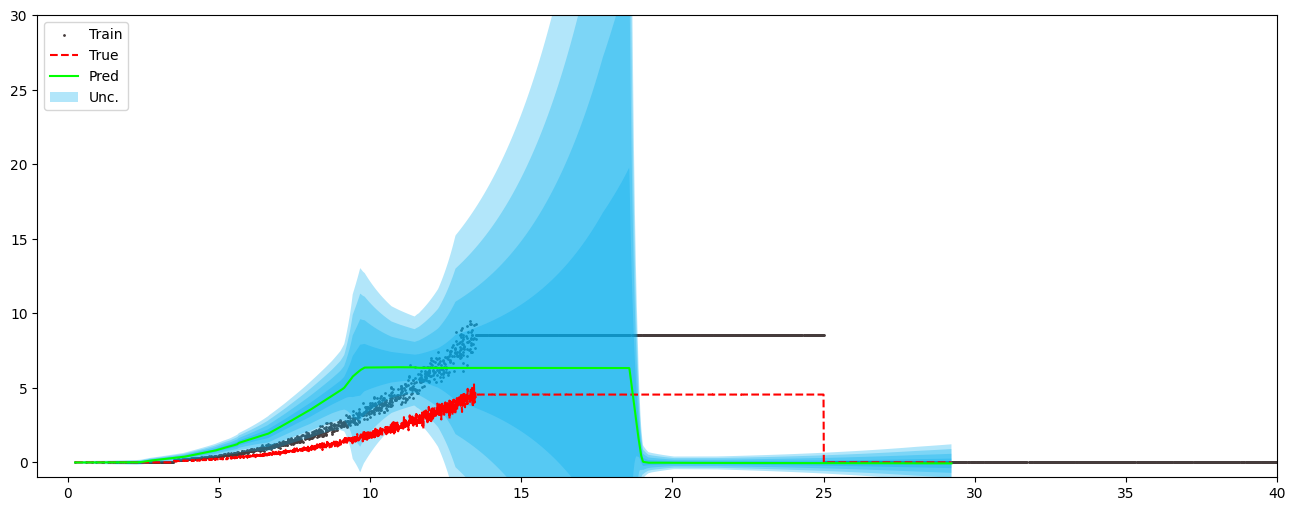

128/128 [==============================] - 0s 283us/step


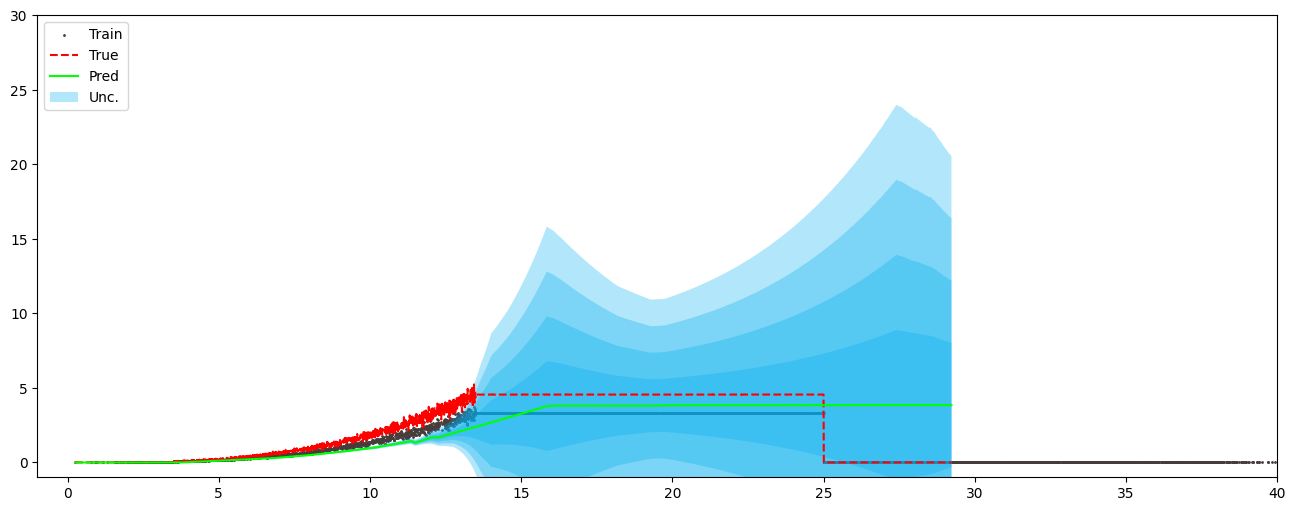

128/128 [==============================] - 0s 300us/step


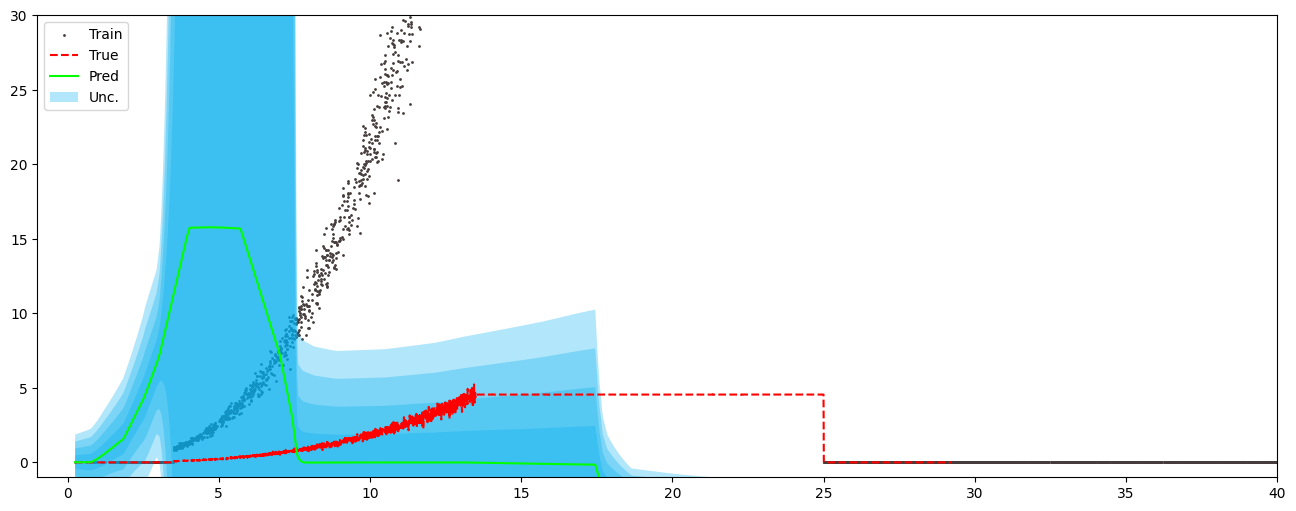

128/128 [==============================] - 0s 287us/step


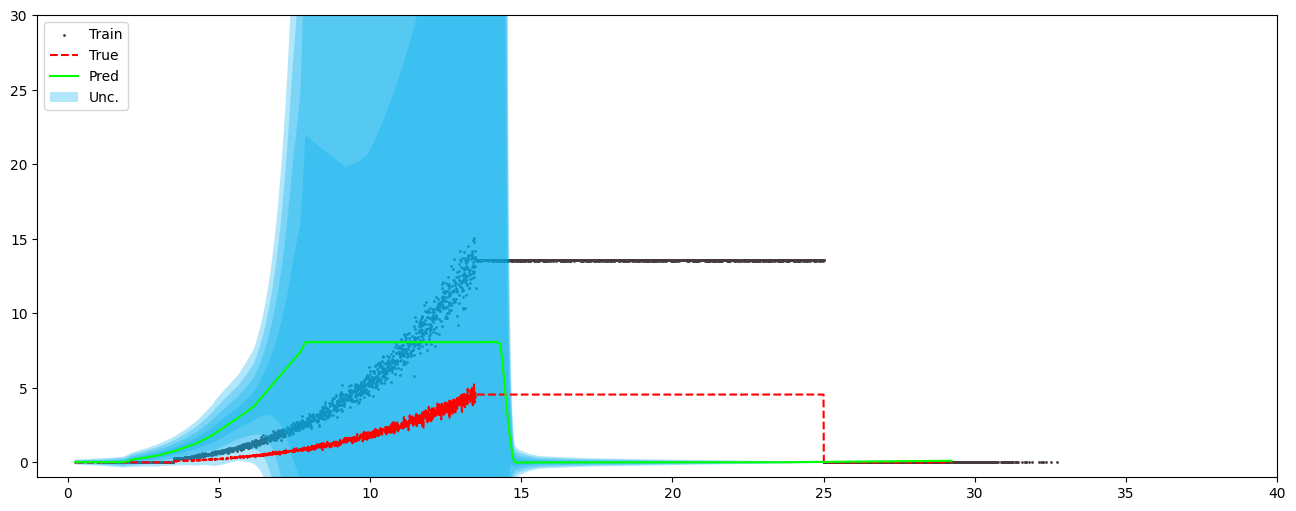

128/128 [==============================] - 0s 298us/step


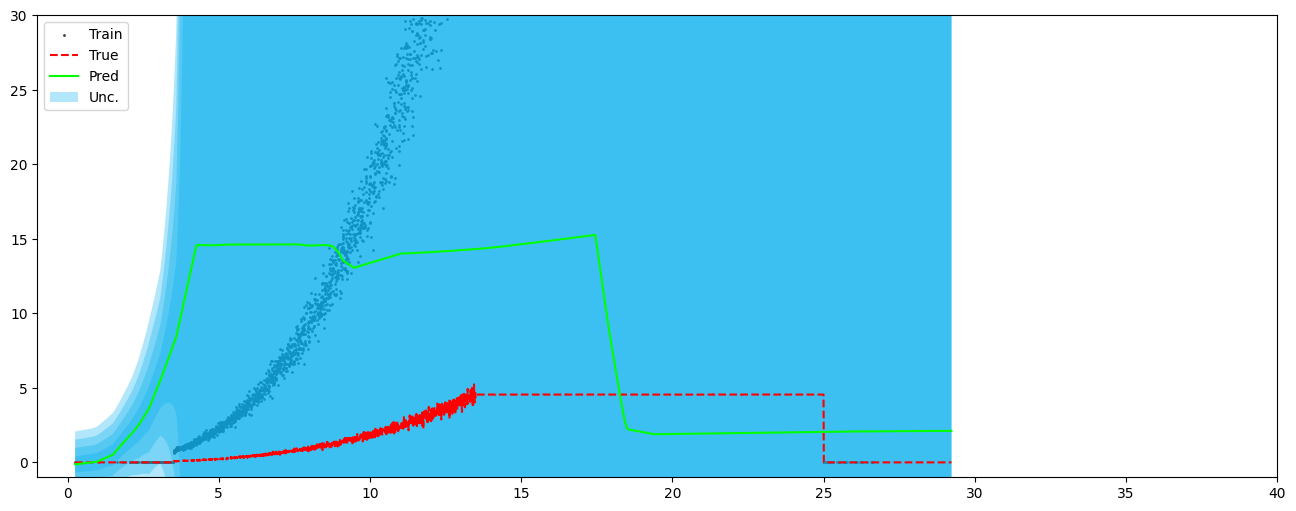

128/128 [==============================] - 0s 291us/step


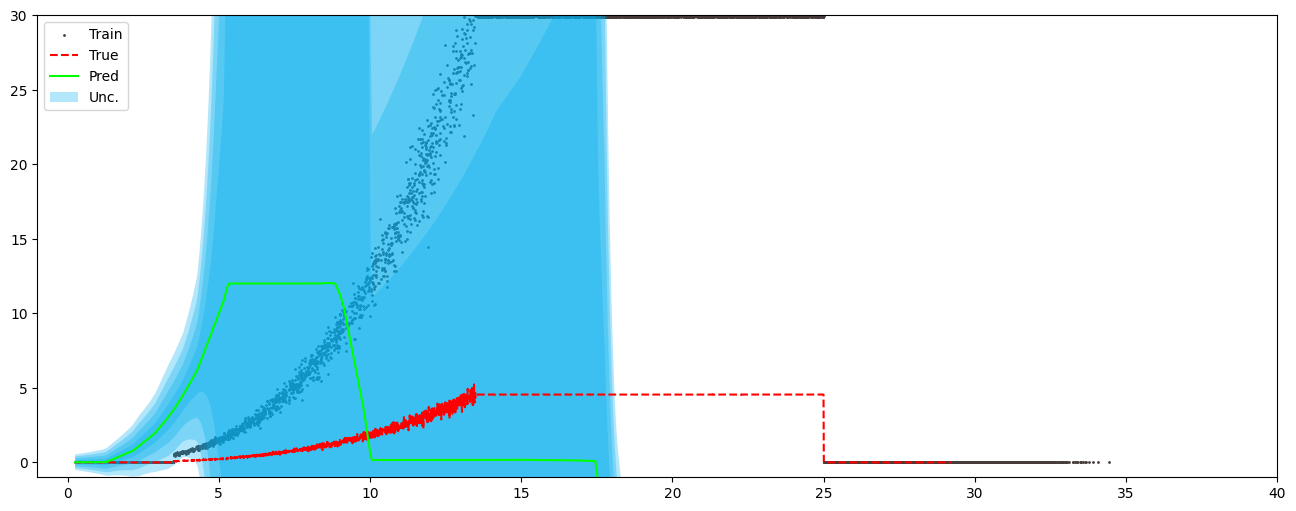

128/128 [==============================] - 0s 296us/step


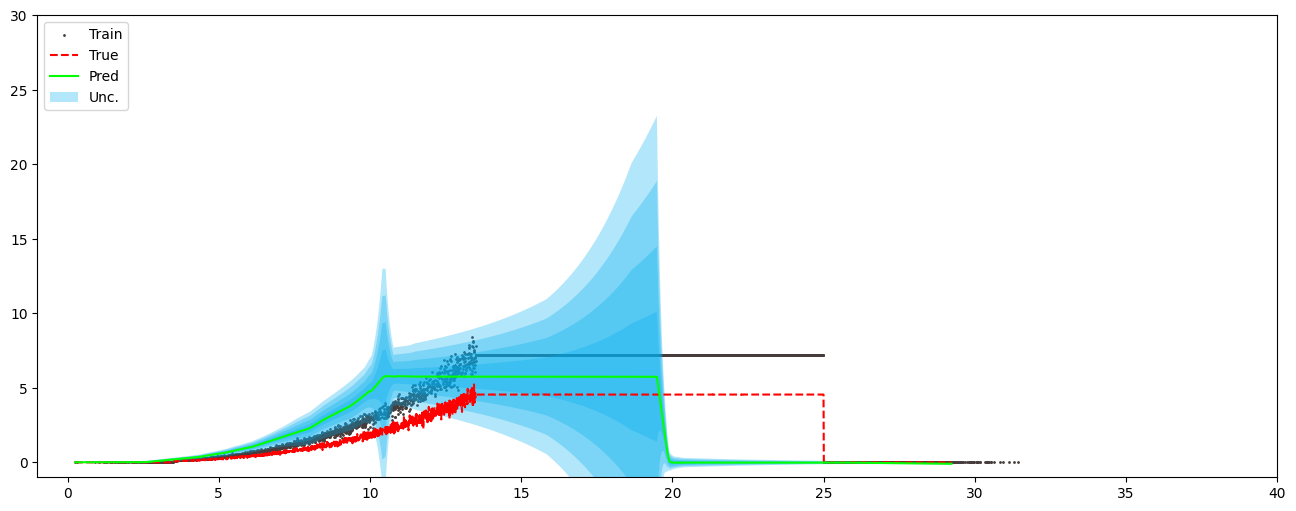

128/128 [==============================] - 0s 288us/step


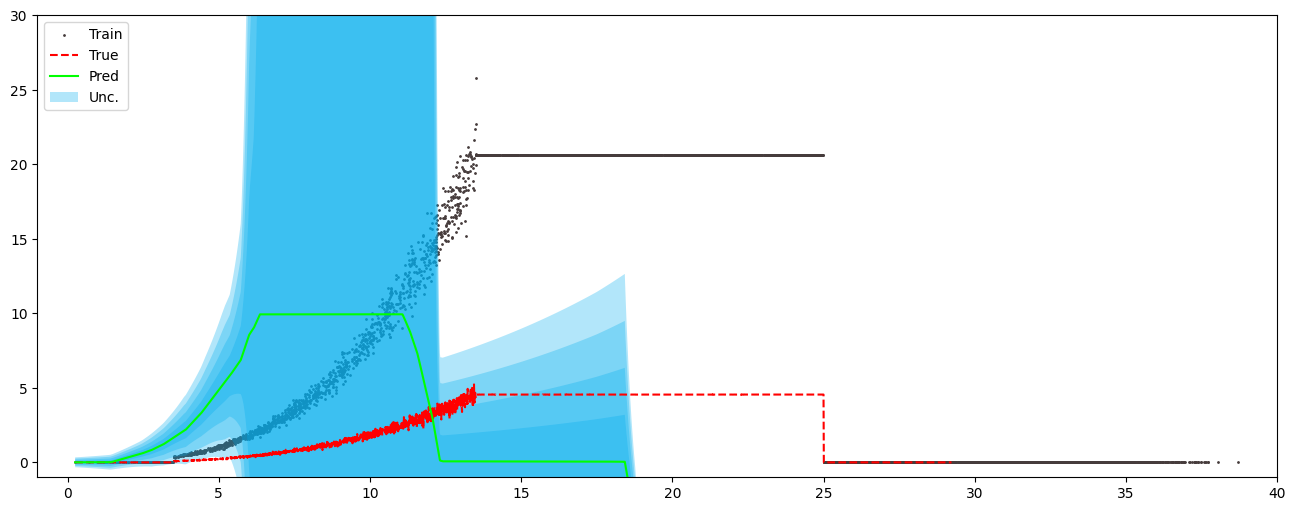

128/128 [==============================] - 0s 288us/step


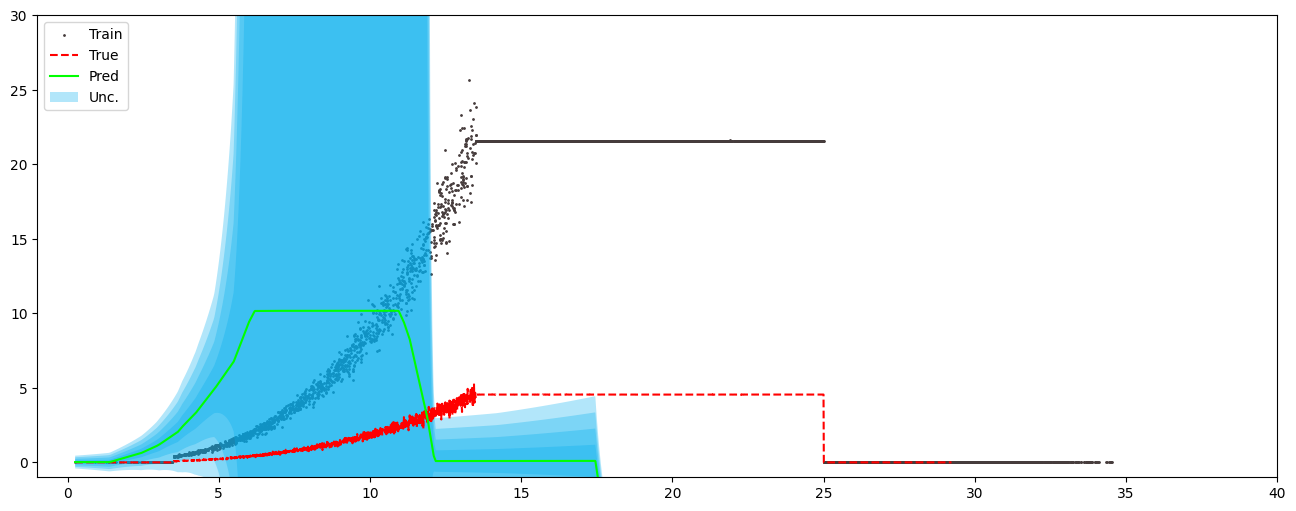

128/128 [==============================] - 0s 365us/step


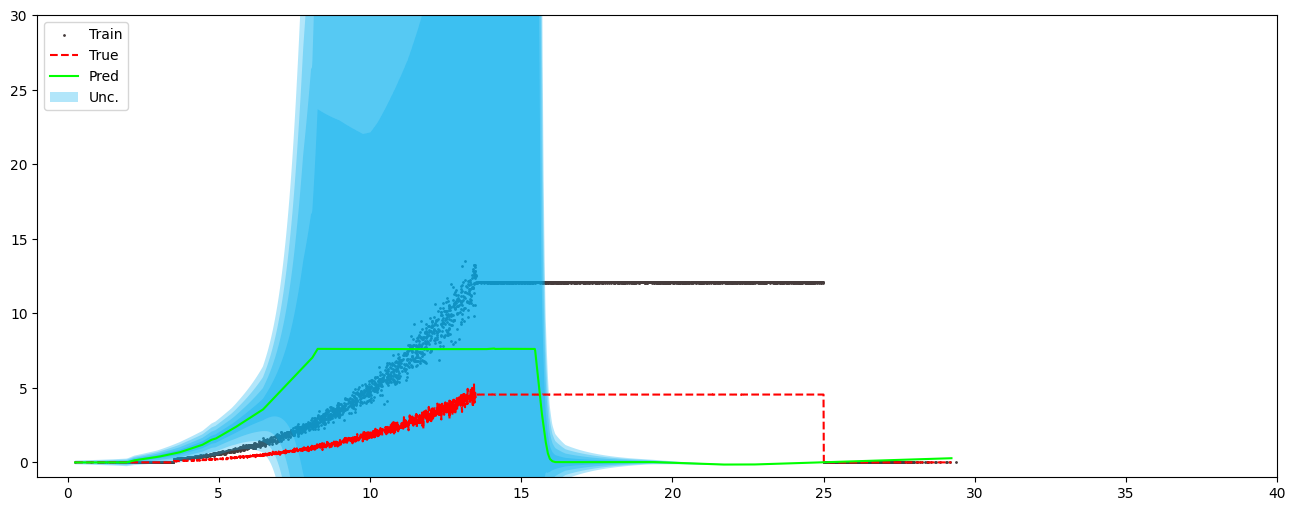

In [15]:
communication_round = 9
client_id = 2

def load_and_predict_client_model(communication_round, client_id):
        model_mom = "experiments_wind/"
        folder_name = "experiment_1" 
        dir_name = "2023_11_24"
        model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)     


        # Read in the model
        model_path_clients = model_dir + "communication_round_%03d/" % (communication_round) + "client_id_%02d.pt" % client_id
        client_model = tf.keras.models.load_model(model_path_clients, custom_objects={'EvidentialRegressionLoss': EvidentialRegressionLoss})

        # Read in client specific data
        train_dataset_client = []

        # Read in subset based on local_id
        with open(f'clients_single_blade/client_{client_id}.json', 'r') as f:
                train_dataset_client = pd.read_json(f, orient='records', lines=True)

        train_data_x = train_dataset_client['Wind Speed (m/s)']
        train_data_y = train_dataset_client['Power Output (MW)']

        # Test data
        test_data_x = test_data[['Wind Speed (m/s)', 'Blade Length (m)']]
        test_data_y = test_data['Power Output (MW)']
        # PREIDCTION
        client_prediction = client_model.predict(test_data_x.values)
        client_uncertainty = get_uncertainty_estimation2(client_prediction, test_data_x.values)

        plot_predictions2(train_data_x.values, train_data_y.values, test_data_x.values, test_data_y.values, client_prediction)

load_and_predict_client_model(communication_round, client_id=0)
load_and_predict_client_model(communication_round, client_id=1)
load_and_predict_client_model(communication_round, client_id=2)
load_and_predict_client_model(communication_round, client_id=3)
load_and_predict_client_model(communication_round, client_id=4)
load_and_predict_client_model(communication_round, client_id=5)
load_and_predict_client_model(communication_round, client_id=6)
load_and_predict_client_model(communication_round, client_id=7)
load_and_predict_client_model(communication_round, client_id=8)
load_and_predict_client_model(communication_round, client_id=9)

# Client loss over rounds

In [12]:
model_mom = "experiments_wind/"
folder_name = "experiment_1" 
dir_name = "2023_11_27"
model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)     
client_id = 3

test_data_x = test_data[['Wind Speed (m/s)', 'Blade Length (m)']]
test_data_y = test_data['Power Output (MW)']


loss_over_rounds = []
evidential_loss_over_rounds = []
# Loop through communication rounds
for communication_round in range(51):
    # Generate the model path for each round
    model_path_clients = model_dir + "communication_round_%03d/" % (communication_round) + "client_id_%02d.pt" % client_id
    client_model = tf.keras.models.load_model(model_path_clients, custom_objects={'EvidentialRegressionLoss': EvidentialRegressionLoss})
    y_prediction = client_model.predict(test_data_x.values)
    loss_over_rounds.append(mse_evidential_loss(y_prediction, test_data_y))
    evidential_loss_over_rounds.append(EvidentialRegressionLoss(test_data_y.values, y_prediction))

NameError: name 'EvidentialRegressionLoss' is not defined

In [35]:
def mse_evidential_loss(predictions, test_data_y):
    # extract parameters from NIG (normal inverse-gamma)
    mu, v, alpha, beta = tf.split(predictions, 4, axis=1)
    mu = mu[:, 0]
    # calculate mse
    mse = fl_utils.mean_squared_error(test_data_y, mu)
    return mse
def EvidentialRegressionLoss(true, pred):
    return edl.losses.EvidentialRegression(true, pred, coeff=1e-2)

In [36]:
model_mom = "experiments_wind/"
folder_name = "experiment_1" 
dir_name = "2023_11_27"
model_dir = model_mom + "%s/%s/" % (folder_name, dir_name)     
client_id = 3

test_data_x = test_data[['Wind Speed (m/s)', 'Blade Length (m)']]
test_data_y = test_data['Power Output (MW)']


loss_over_rounds = []
evidential_loss_over_rounds = []
# Loop through communication rounds
for communication_round in range(51):
    # Generate the model path for each round
    model_path_clients = model_dir + "communication_round_%03d/" % (communication_round) + "client_id_%02d.pt" % client_id
    client_model = tf.keras.models.load_model(model_path_clients, custom_objects={'EvidentialRegressionLoss': EvidentialRegressionLoss})
    y_prediction = client_model.predict(test_data_x.values)
    loss_over_rounds.append(mse_evidential_loss(y_prediction, test_data_y))
    evidential_loss_over_rounds.append(EvidentialRegressionLoss(test_data_y.values, y_prediction))

512/512 [==============================] - 0s 246us/step


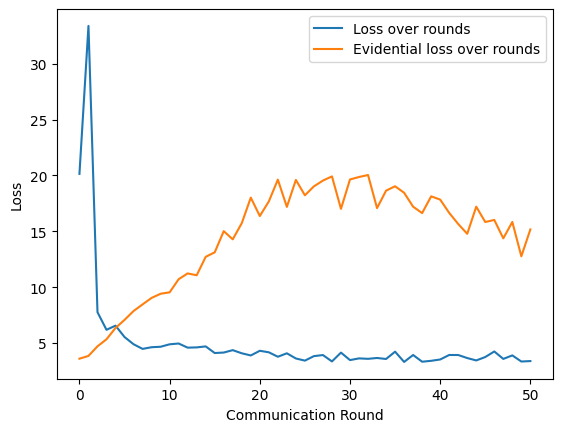

In [17]:
plt.plot(loss_over_rounds, label='Loss over rounds')
plt.plot(evidential_loss_over_rounds, label='Evidential loss over rounds')
plt.xlabel('Communication Round')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
loss_over_rounds

[0.5951698403311015,
 0.3512736169900738,
 0.29346138575083636,
 0.15662868933042198,
 0.6868289020450745,
 0.662973911603542,
 1.1272831455666104,
 0.9628361510322804,
 1.0988208261496861,
 0.9479677500597948,
 0.5430265109589874,
 0.6751582823832969,
 0.6527700906933508,
 0.4638571531414235,
 0.343048067752041,
 0.3037849485018467,
 0.20501257805714446,
 0.70038387937211,
 0.22492620816397485,
 0.2510363683003308,
 0.38316027254621415]

In [70]:
evidential_loss_over_rounds

[<tf.Tensor: shape=(), dtype=float32, numpy=4.640896>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.053227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7.4610014>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.3415284>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0444>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.430251>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0121684>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.802492>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.887166>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.532381>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.379183>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.2712607>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.4781046>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.5301676>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.019319>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.728593>]

In [35]:
import configs
conf = configs.give_args()
model_mom = "experiments_wind/"

conf.folder_name = "experiment_1" 
conf.dir_name = "new_test_function"

model_dir = model_mom + "%s/%s/" % (conf.folder_name, conf.dir_name) 
model_path = model_dir + "communication_round_%03d/" % conf.round 
conf.model_dir = model_path

In [36]:
print("Directory : ", conf.model_dir)
files = os.listdir(conf.model_dir)
models_array = []
for file in files:
    load_model = fl_utils.initial_model_tensorflow()
    
    if not load_model.built:
        input_shape = (2,) # adjust this as per your requirements
        if input_shape is None:
            raise ValueError("Input shape must be specified in 'conf' to build the model.")
        load_model.build((None,) + input_shape)
    
    load_model = tf.keras.models.load_model(conf.model_dir + file, custom_objects={'EvidentialRegressionLoss': fl_utils.EvidentialRegressionLoss})
    models_array.append(load_model)

Directory :  experiments_wind/experiment_1/new_test_function/communication_round_000/


In [38]:
model_weights = [model.get_weights() for model in models_array]


In [48]:
len(model_weights)
model_1_weights = model_weights[0]
model_2_weights = model_weights[1]
model_3_weights = model_weights[2]

display(model_1_weights[0])
display(model_2_weights[0])
display(model_3_weights[0])
print()
param1 = (model_1_weights[0] + model_2_weights[0] + model_3_weights[0]) / 3
display(param1)


array([[-0.18228821,  0.18337807, -0.23335539, -0.03422946,  0.26430407,
        -0.3760737 , -0.29090554, -0.12813957,  0.00648044, -0.13160628,
        -0.06193228,  0.04321882,  0.25586262,  0.00951545,  0.12175056,
         0.1374904 ,  0.13911402,  0.1652242 , -0.21112366, -0.07147206,
         0.3008747 ,  0.09339289,  0.25471115, -0.2532192 ,  0.15640333,
         0.1312626 , -0.26658356,  0.29900247, -0.13981801, -0.21319304,
         0.03610843,  0.19168681, -0.22681554, -0.12664276, -0.18816122,
        -0.07389953,  0.05075103,  0.21930264, -0.18813771,  0.25410563,
        -0.20812386,  0.48690233, -0.0627951 , -0.17019702, -0.28931397,
         0.08046356,  0.2178352 , -0.24342918,  0.05785416,  0.33205178,
         0.22406381,  0.25570887, -0.06453901,  0.05113524, -0.4342684 ,
         0.28279763, -0.17533785, -0.22065383,  0.09635004, -0.17072691,
        -0.04090065, -0.16808708,  0.08915794, -0.23692364],
       [ 0.21958226,  0.08521771,  0.04124115,  0.168818  , -0.

array([[-0.1679146 ,  0.19589783, -0.21070565,  0.01183026,  0.27648687,
        -0.39315993, -0.29346207, -0.07217287,  0.02030944, -0.13160628,
        -0.01612246,  0.04321882,  0.30005467,  0.03609596,  0.1330126 ,
         0.14573742,  0.17129673,  0.19087696, -0.21112366, -0.07147206,
         0.31747082,  0.11527619,  0.2874024 , -0.2532192 ,  0.18364905,
         0.1312626 , -0.26658356,  0.3214385 , -0.13981801, -0.21319304,
         0.03610843,  0.22449382, -0.27739322, -0.12664276, -0.18816122,
        -0.0741093 ,  0.05075103,  0.23569427, -0.18813771,  0.26912898,
        -0.20812386,  0.52666426, -0.05421453, -0.16741918, -0.28931397,
         0.08046356,  0.23545718, -0.24342918,  0.09474331,  0.3422934 ,
         0.23632978,  0.26767358, -0.02294211,  0.05113524, -0.41951776,
         0.28279763, -0.17533785, -0.0572896 ,  0.09635004, -0.21201319,
        -0.04090065, -0.18169774,  0.08915794, -0.2390818 ],
       [ 0.23458335,  0.09654658,  0.03343351,  0.23478328, -0.

array([[-1.68243930e-01,  1.93106994e-01, -4.35907662e-01,
        -7.31662363e-02,  2.64304072e-01, -4.40302730e-01,
        -3.34907889e-01, -3.15224856e-01, -6.29189238e-02,
        -1.31606281e-01, -7.26832211e-01,  4.32188213e-02,
         2.93200165e-01, -1.52446941e-01,  1.21750563e-01,
         1.37490407e-01,  1.36209503e-01,  1.27820909e-01,
        -2.11123660e-01, -7.14720637e-02,  3.20087373e-01,
         2.39698645e-02,  2.23351121e-01, -2.53219187e-01,
         1.56403333e-01,  1.31262600e-01, -2.66583562e-01,
         2.99002469e-01, -1.39818013e-01, -2.13193044e-01,
         3.61084342e-02,  1.52183875e-01, -2.83538580e-01,
        -1.26642764e-01, -1.88161224e-01, -8.37940797e-02,
         5.07510304e-02,  2.19302639e-01, -1.88137710e-01,
         1.61099449e-01, -2.08123863e-01,  4.86902326e-01,
        -1.54013574e-01, -1.96772873e-01, -2.89313972e-01,
         8.04635584e-02,  2.12305784e-01, -2.43429184e-01,
         5.78541607e-02,  3.32051784e-01,  2.18267918e-0

array([[-0.17281558,  0.1907943 , -0.2933229 , -0.03185515,  0.268365  ,
        -0.40317878, -0.30642518, -0.17184575, -0.01204301, -0.13160628,
        -0.26829565,  0.04321882,  0.28303912, -0.03561184,  0.12550457,
         0.14023942,  0.1488734 ,  0.16130735, -0.21112366, -0.07147206,
         0.31281096,  0.07754631,  0.25515488, -0.2532192 ,  0.16548523,
         0.1312626 , -0.26658356,  0.30648115, -0.13981801, -0.21319304,
         0.03610843,  0.18945484, -0.26258245, -0.12664276, -0.18816121,
        -0.07726764,  0.05075103,  0.22476651, -0.18813771,  0.22811134,
        -0.20812386,  0.50015634, -0.09034107, -0.17812969, -0.28931397,
         0.08046356,  0.22186606, -0.24342918,  0.07015055,  0.33546567,
         0.2262205 ,  0.26194194, -0.04512943,  0.05113524, -0.5436256 ,
         0.28279763, -0.17533785, -0.17404652,  0.09635004, -0.19667377,
        -0.04090065, -0.17935969,  0.08915794, -0.2555185 ],
       [ 0.21780725,  0.08694495,  0.04309224,  0.17993619, -0.

In [52]:
def average_weights(model_weights):
    """ Averages weights from provided list of model weight sets. """
    average_weights = []

    # Number of layers
    num_layers = len(model_weights[0])

    for layer in range(num_layers):
        # Collect this layer's weights from each model
        layer_weights = np.array([weights[layer] for weights in model_weights])

        # Average layer weights across all models
        layer_average = np.mean(layer_weights, axis=0)

        average_weights.append(layer_average)

    return average_weights



global_model = fl_utils.initial_model_tensorflow()
if not global_model.built:
    input_shape = (2,)
    if input_shape is None:
        raise ValueError("Input shape must be specified in 'conf' to build the model.")
    global_model.build((None,) + input_shape) 

average_weights1 = average_weights(model_weights)
global_model.set_weights(average_weights1)

print(global_model.get_weights()[0])



[[-0.17281558  0.1907943  -0.2933229  -0.03185515  0.268365   -0.40317878
  -0.30642518 -0.17184575 -0.01204301 -0.13160628 -0.26829565  0.04321882
   0.28303912 -0.03561184  0.12550457  0.14023942  0.1488734   0.16130735
  -0.21112366 -0.07147206  0.31281096  0.07754631  0.25515488 -0.2532192
   0.16548523  0.1312626  -0.26658356  0.30648115 -0.13981801 -0.21319304
   0.03610843  0.18945484 -0.26258245 -0.12664276 -0.18816121 -0.07726764
   0.05075103  0.22476651 -0.18813771  0.22811134 -0.20812386  0.50015634
  -0.09034107 -0.17812969 -0.28931397  0.08046356  0.22186606 -0.24342918
   0.07015055  0.33546567  0.2262205   0.26194194 -0.04512943  0.05113524
  -0.5436256   0.28279763 -0.17533785 -0.17404652  0.09635004 -0.19667377
  -0.04090065 -0.17935969  0.08915794 -0.2555185 ]
 [ 0.21780725  0.08694495  0.04309224  0.17993619 -0.20305675  0.17886864
   0.22098769  0.0479821   0.17373507 -0.06614381  0.03653191 -0.24102719
  -0.02269334  0.06223054 -0.09279237 -0.02410977  0.00121983 

In [55]:
import numpy as np

if np.array_equal(global_model.get_weights()[0], param1):
    print("the arrays are equal")

the arrays are equal


In [29]:
import json
import pandas as pd

data_dict = {}

for i in range(10):
    with open(f'clients_single_blade/client_{i}.json', 'r') as f:
        # Parse the JSON string into a DataFrame
        client_data = pd.read_json(f, lines=True)
        # Add the DataFrame to the dictionary
        data_dict[i] = client_data

In [30]:
display(data_dict)

{0:         x_values  x_wind_speed  y_ground_truth  observed_data      model  \
 0       0.070330      0.250000        0.617451       0.493543   0.690978   
 1       0.070330      0.250000        0.617451       0.493543   0.690978   
 2       0.070330      0.250000        0.617451       0.493543   0.690978   
 3       0.070330      0.250000        0.617451       0.493543   0.690978   
 4       0.117216      1.186398        0.695751       3.243701   7.972613   
 ...          ...           ...             ...            ...        ...   
 16379  11.903297     25.905381       20.378505      63.632768  43.527587   
 16380  11.791941     27.323920       20.192542      71.069900  45.829009   
 16381  11.791941     27.323920       20.192542      71.069900  45.829009   
 16382  11.791941     27.323920       20.192542      71.069900  45.829009   
 16383  11.791941     27.323920       20.192542      71.069900  45.829009   
 
        Wind Speed (m/s)  Blade Length (m)  Power Output (W)  \
 0     

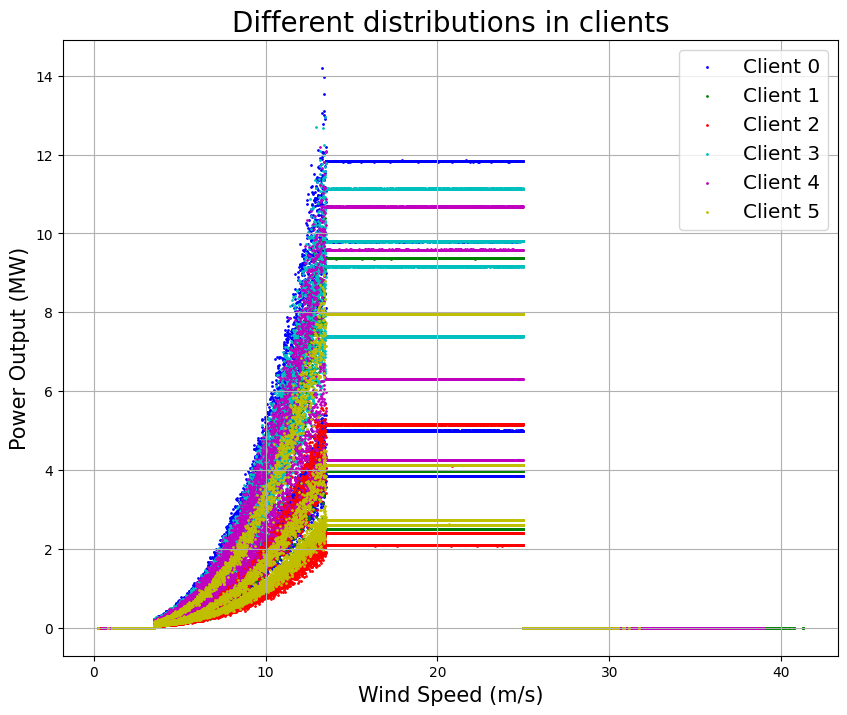

In [31]:
import matplotlib.pyplot as plt

# Create a list of colors for the plot
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

plt.figure(figsize=(10, 8))  # Increase the size of the figure

for i, (client_id, client_data) in enumerate(data_dict.items()):
    if i == 2:  # Only plot the first 4 clients
        pass
    elif i>=6:
        break
    plt.scatter(client_data['Wind Speed (m/s)'], client_data['Power Output (MW)'], color=colors[i % len(colors)], label=f'Client {client_id}', s=1)  # Increase the size of the markers

plt.title('Different distributions in clients', fontsize=20)  # Add a title
plt.xlabel('Wind Speed (m/s)', fontsize=15)  # Add a label for the x-axis
plt.ylabel('Power Output (MW)', fontsize=15)  # Add a label for the y-axis
plt.grid(True)  # Add a grid
plt.legend(fontsize='x-large')
plt.show()